# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [4]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

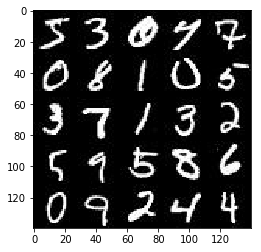

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

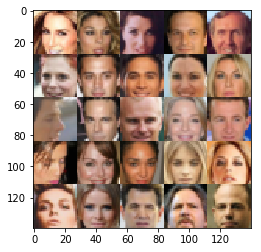

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


TensorFlow Version: 1.1.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [8]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                               name='input_real')
    input_z = tf.placeholder(tf.float32,(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [11]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.01
    dropout_rate = 0.5
    with tf.variable_scope('discriminator', reuse=reuse):
        #input layer is 28*28*3
        initializer1 = tf.contrib.layers.xavier_initializer()
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', 
                              kernel_initializer=initializer1)
        relu1 = tf.maximum(alpha * x1, x1)
        relu1 = tf.identity(relu1, name='relu1')
        #14*14*64
    
        initializer2 = tf.contrib.layers.xavier_initializer()
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', 
                              kernel_initializer=initializer2)
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        relu2 = tf.identity(relu2, name='relu2')
        #7*7*28
        
        
        # flatten it 
        flat = tf.reshape(relu2, (-1, 7*7*128))
        logits = tf.layers.dense(flat, 1)
        logits = tf.identity(logits, name='logits')
        logits = tf.layers.dropout(logits, rate=dropout_rate, training=True)
        out = tf.sigmoid(logits)
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [27]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.01
    with tf.variable_scope('generator', reuse= not is_train):
        # first fully connected layer
        x1 = tf.layers.dense(z, 7*7*128)
        # reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1,7,7,128))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.identity(x1, name='x1')
        #7*7*128
        
        x2 = tf.layers.conv2d_transpose(x1, 64, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.identity(x2, name='x2')
        #14*14*64
        
        #output layer
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        #28*28*out_channel_dim

        out = tf.tanh(logits)
        out = tf.identity(out, name='logits')
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [28]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    g_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                           labels=tf.ones_like(d_logits_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                        labels=tf.zeros_like(d_logits_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                                   labels=tf.ones_like(d_logits_fake)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [16]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss,var_list=d_vars, name='d_train_opt')
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss,var_list=g_vars, name='g_train_opt')
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [30]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, input_learning_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim) 
    if data_image_mode == 'RGB':
        out_channel_dim = 3
    else:
        out_channel_dim = 1
    
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, input_learning_rate, beta1)
    
    print_every = 10
    show_every = 100
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2
                
                _ = sess.run(d_train_opt, feed_dict={input_real:batch_images,
                                                     input_z:batch_z,
                                                     input_learning_rate:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={input_real:batch_images,
                                                     input_z:batch_z,
                                                     input_learning_rate:learning_rate})
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z:batch_z, input_real:batch_images})
                    train_loss_g = g_loss.eval({input_z:batch_z, input_real:batch_images})
                       
                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                            "Step: {}...".format(steps),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d),
                            "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, out_channel_dim, data_image_mode)
                    
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Step: 10... Discriminator Loss: 1.0282... Generator Loss: 1.1786
Epoch 0/2... Step: 20... Discriminator Loss: 2.7343... Generator Loss: 5.6839
Epoch 0/2... Step: 30... Discriminator Loss: 1.4484... Generator Loss: 1.2280
Epoch 0/2... Step: 40... Discriminator Loss: 1.5865... Generator Loss: 0.6961
Epoch 0/2... Step: 50... Discriminator Loss: 1.3006... Generator Loss: 0.9040
Epoch 0/2... Step: 60... Discriminator Loss: 1.6453... Generator Loss: 0.7116
Epoch 0/2... Step: 70... Discriminator Loss: 1.5830... Generator Loss: 2.0412
Epoch 0/2... Step: 80... Discriminator Loss: 1.4021... Generator Loss: 0.8874
Epoch 0/2... Step: 90... Discriminator Loss: 1.3494... Generator Loss: 1.3208
Epoch 0/2... Step: 100... Discriminator Loss: 1.9071... Generator Loss: 0.4945


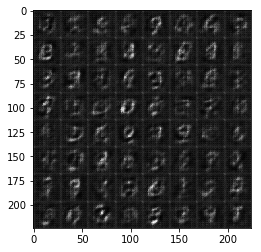

Epoch 0/2... Step: 110... Discriminator Loss: 1.6311... Generator Loss: 0.5304
Epoch 0/2... Step: 120... Discriminator Loss: 1.2204... Generator Loss: 1.1037
Epoch 0/2... Step: 130... Discriminator Loss: 1.5571... Generator Loss: 0.5396
Epoch 0/2... Step: 140... Discriminator Loss: 1.2007... Generator Loss: 1.1826
Epoch 0/2... Step: 150... Discriminator Loss: 1.2138... Generator Loss: 0.9874
Epoch 0/2... Step: 160... Discriminator Loss: 1.9098... Generator Loss: 0.4391
Epoch 0/2... Step: 170... Discriminator Loss: 1.1869... Generator Loss: 1.2169
Epoch 0/2... Step: 180... Discriminator Loss: 1.3010... Generator Loss: 1.5603
Epoch 0/2... Step: 190... Discriminator Loss: 1.1973... Generator Loss: 0.9450
Epoch 0/2... Step: 200... Discriminator Loss: 1.4727... Generator Loss: 2.3472


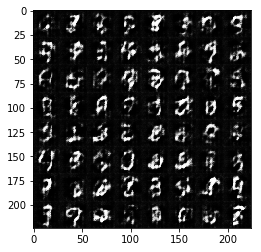

Epoch 0/2... Step: 210... Discriminator Loss: 1.2261... Generator Loss: 0.8614
Epoch 0/2... Step: 220... Discriminator Loss: 1.5980... Generator Loss: 1.9268
Epoch 0/2... Step: 230... Discriminator Loss: 1.7007... Generator Loss: 0.5263
Epoch 0/2... Step: 240... Discriminator Loss: 1.2850... Generator Loss: 1.2822
Epoch 0/2... Step: 250... Discriminator Loss: 1.1067... Generator Loss: 1.5180
Epoch 0/2... Step: 260... Discriminator Loss: 1.0847... Generator Loss: 1.2391
Epoch 0/2... Step: 270... Discriminator Loss: 1.1339... Generator Loss: 1.4849
Epoch 0/2... Step: 280... Discriminator Loss: 1.3183... Generator Loss: 0.7767
Epoch 0/2... Step: 290... Discriminator Loss: 1.5968... Generator Loss: 0.5946
Epoch 0/2... Step: 300... Discriminator Loss: 1.1361... Generator Loss: 1.0804


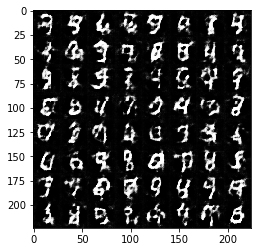

Epoch 0/2... Step: 310... Discriminator Loss: 1.4536... Generator Loss: 1.9314
Epoch 0/2... Step: 320... Discriminator Loss: 1.3187... Generator Loss: 2.0307
Epoch 0/2... Step: 330... Discriminator Loss: 1.1155... Generator Loss: 1.1308
Epoch 0/2... Step: 340... Discriminator Loss: 1.1670... Generator Loss: 1.1226
Epoch 0/2... Step: 350... Discriminator Loss: 1.1199... Generator Loss: 1.7494
Epoch 0/2... Step: 360... Discriminator Loss: 1.0744... Generator Loss: 1.3541
Epoch 0/2... Step: 370... Discriminator Loss: 1.1934... Generator Loss: 0.8481
Epoch 0/2... Step: 380... Discriminator Loss: 1.1420... Generator Loss: 1.0576
Epoch 0/2... Step: 390... Discriminator Loss: 1.1520... Generator Loss: 1.6331
Epoch 0/2... Step: 400... Discriminator Loss: 1.5219... Generator Loss: 1.8752


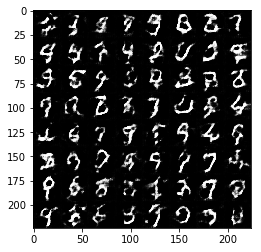

Epoch 0/2... Step: 410... Discriminator Loss: 1.1156... Generator Loss: 1.3217
Epoch 0/2... Step: 420... Discriminator Loss: 1.4088... Generator Loss: 0.7225
Epoch 0/2... Step: 430... Discriminator Loss: 1.3774... Generator Loss: 1.7031
Epoch 0/2... Step: 440... Discriminator Loss: 1.1532... Generator Loss: 1.1070
Epoch 0/2... Step: 450... Discriminator Loss: 1.4574... Generator Loss: 0.6508
Epoch 0/2... Step: 460... Discriminator Loss: 1.1546... Generator Loss: 1.1620
Epoch 0/2... Step: 470... Discriminator Loss: 1.1946... Generator Loss: 0.8640
Epoch 0/2... Step: 480... Discriminator Loss: 2.7111... Generator Loss: 0.3597
Epoch 0/2... Step: 490... Discriminator Loss: 1.1867... Generator Loss: 0.9837
Epoch 0/2... Step: 500... Discriminator Loss: 1.1984... Generator Loss: 1.5710


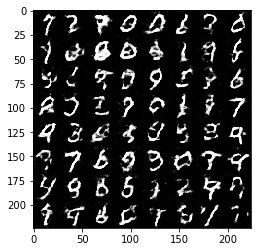

Epoch 0/2... Step: 510... Discriminator Loss: 1.6994... Generator Loss: 1.7305
Epoch 0/2... Step: 520... Discriminator Loss: 1.4342... Generator Loss: 0.5966
Epoch 0/2... Step: 530... Discriminator Loss: 1.2237... Generator Loss: 0.8814
Epoch 0/2... Step: 540... Discriminator Loss: 1.2761... Generator Loss: 0.7663
Epoch 0/2... Step: 550... Discriminator Loss: 1.1253... Generator Loss: 0.8962
Epoch 0/2... Step: 560... Discriminator Loss: 1.1413... Generator Loss: 1.0587
Epoch 0/2... Step: 570... Discriminator Loss: 2.1458... Generator Loss: 0.3780
Epoch 0/2... Step: 580... Discriminator Loss: 1.1872... Generator Loss: 0.8579
Epoch 0/2... Step: 590... Discriminator Loss: 1.1496... Generator Loss: 1.1306
Epoch 0/2... Step: 600... Discriminator Loss: 1.2529... Generator Loss: 0.7888


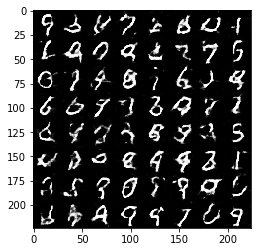

Epoch 0/2... Step: 610... Discriminator Loss: 1.1433... Generator Loss: 1.1042
Epoch 0/2... Step: 620... Discriminator Loss: 1.4052... Generator Loss: 0.7251
Epoch 0/2... Step: 630... Discriminator Loss: 1.2027... Generator Loss: 0.9103
Epoch 0/2... Step: 640... Discriminator Loss: 1.1803... Generator Loss: 1.6232
Epoch 0/2... Step: 650... Discriminator Loss: 1.3300... Generator Loss: 0.6710
Epoch 0/2... Step: 660... Discriminator Loss: 1.5524... Generator Loss: 2.4061
Epoch 0/2... Step: 670... Discriminator Loss: 1.3392... Generator Loss: 0.8449
Epoch 0/2... Step: 680... Discriminator Loss: 1.4464... Generator Loss: 0.8646
Epoch 0/2... Step: 690... Discriminator Loss: 1.1536... Generator Loss: 1.0384
Epoch 0/2... Step: 700... Discriminator Loss: 1.2618... Generator Loss: 0.7833


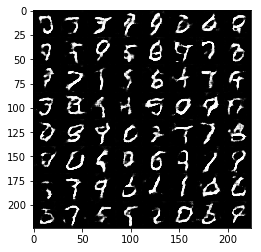

Epoch 0/2... Step: 710... Discriminator Loss: 1.1045... Generator Loss: 0.9925
Epoch 0/2... Step: 720... Discriminator Loss: 1.7648... Generator Loss: 2.1859
Epoch 0/2... Step: 730... Discriminator Loss: 1.0910... Generator Loss: 1.7747
Epoch 0/2... Step: 740... Discriminator Loss: 1.1802... Generator Loss: 1.0023
Epoch 0/2... Step: 750... Discriminator Loss: 1.1902... Generator Loss: 0.9874
Epoch 0/2... Step: 760... Discriminator Loss: 1.0909... Generator Loss: 1.1594
Epoch 0/2... Step: 770... Discriminator Loss: 1.2832... Generator Loss: 0.7053
Epoch 0/2... Step: 780... Discriminator Loss: 1.7202... Generator Loss: 0.4947
Epoch 0/2... Step: 790... Discriminator Loss: 1.2539... Generator Loss: 1.0814
Epoch 0/2... Step: 800... Discriminator Loss: 1.2064... Generator Loss: 0.9640


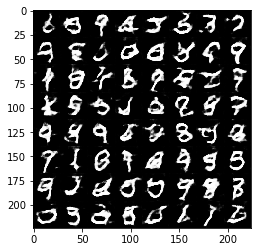

Epoch 0/2... Step: 810... Discriminator Loss: 1.2628... Generator Loss: 0.8174
Epoch 0/2... Step: 820... Discriminator Loss: 1.2058... Generator Loss: 0.7911
Epoch 0/2... Step: 830... Discriminator Loss: 1.1452... Generator Loss: 1.5277
Epoch 0/2... Step: 840... Discriminator Loss: 1.1809... Generator Loss: 0.8378
Epoch 0/2... Step: 850... Discriminator Loss: 1.2255... Generator Loss: 0.8929
Epoch 0/2... Step: 860... Discriminator Loss: 2.5846... Generator Loss: 0.4171
Epoch 0/2... Step: 870... Discriminator Loss: 1.5739... Generator Loss: 1.3831
Epoch 0/2... Step: 880... Discriminator Loss: 1.1630... Generator Loss: 1.1672
Epoch 0/2... Step: 890... Discriminator Loss: 1.0835... Generator Loss: 1.1860
Epoch 0/2... Step: 900... Discriminator Loss: 1.3432... Generator Loss: 0.7330


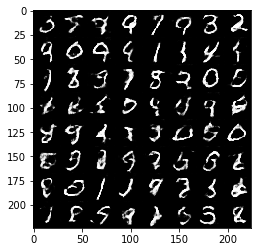

Epoch 0/2... Step: 910... Discriminator Loss: 1.2301... Generator Loss: 0.7521
Epoch 0/2... Step: 920... Discriminator Loss: 1.1387... Generator Loss: 0.9745
Epoch 0/2... Step: 930... Discriminator Loss: 1.2402... Generator Loss: 0.9739
Epoch 1/2... Step: 940... Discriminator Loss: 1.0812... Generator Loss: 1.0400
Epoch 1/2... Step: 950... Discriminator Loss: 1.3458... Generator Loss: 0.7386
Epoch 1/2... Step: 960... Discriminator Loss: 1.3639... Generator Loss: 0.7362
Epoch 1/2... Step: 970... Discriminator Loss: 1.1278... Generator Loss: 1.1123
Epoch 1/2... Step: 980... Discriminator Loss: 1.1999... Generator Loss: 0.8171
Epoch 1/2... Step: 990... Discriminator Loss: 1.1787... Generator Loss: 1.5712
Epoch 1/2... Step: 1000... Discriminator Loss: 1.4287... Generator Loss: 0.6688


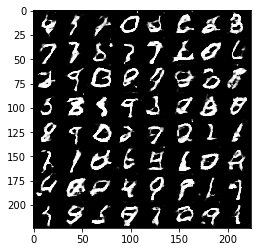

Epoch 1/2... Step: 1010... Discriminator Loss: 1.1314... Generator Loss: 1.2083
Epoch 1/2... Step: 1020... Discriminator Loss: 1.1749... Generator Loss: 1.3946
Epoch 1/2... Step: 1030... Discriminator Loss: 1.0982... Generator Loss: 0.9268
Epoch 1/2... Step: 1040... Discriminator Loss: 1.2802... Generator Loss: 0.6479
Epoch 1/2... Step: 1050... Discriminator Loss: 1.1164... Generator Loss: 1.3746
Epoch 1/2... Step: 1060... Discriminator Loss: 1.1195... Generator Loss: 1.2998
Epoch 1/2... Step: 1070... Discriminator Loss: 1.1053... Generator Loss: 1.0065
Epoch 1/2... Step: 1080... Discriminator Loss: 1.1663... Generator Loss: 1.0020
Epoch 1/2... Step: 1090... Discriminator Loss: 1.2043... Generator Loss: 0.9514
Epoch 1/2... Step: 1100... Discriminator Loss: 1.0843... Generator Loss: 1.1480


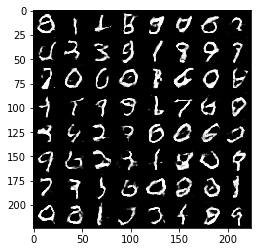

Epoch 1/2... Step: 1110... Discriminator Loss: 1.1070... Generator Loss: 1.9013
Epoch 1/2... Step: 1120... Discriminator Loss: 1.1818... Generator Loss: 0.8270
Epoch 1/2... Step: 1130... Discriminator Loss: 1.3042... Generator Loss: 1.9822
Epoch 1/2... Step: 1140... Discriminator Loss: 1.2154... Generator Loss: 0.9139
Epoch 1/2... Step: 1150... Discriminator Loss: 1.4199... Generator Loss: 0.6884
Epoch 1/2... Step: 1160... Discriminator Loss: 1.1107... Generator Loss: 0.9989
Epoch 1/2... Step: 1170... Discriminator Loss: 1.2070... Generator Loss: 0.9634
Epoch 1/2... Step: 1180... Discriminator Loss: 1.1670... Generator Loss: 1.3024
Epoch 1/2... Step: 1190... Discriminator Loss: 1.2188... Generator Loss: 1.3881
Epoch 1/2... Step: 1200... Discriminator Loss: 1.2064... Generator Loss: 0.9176


Epoch 1/2... Step: 1210... Discriminator Loss: 1.1263... Generator Loss: 1.1460
Epoch 1/2... Step: 1220... Discriminator Loss: 1.1227... Generator Loss: 1.2241
Epoch 1/2... Step: 1230... Discriminator Loss: 1.2734... Generator Loss: 0.7450
Epoch 1/2... Step: 1240... Discriminator Loss: 1.1724... Generator Loss: 1.0197
Epoch 1/2... Step: 1250... Discriminator Loss: 1.1116... Generator Loss: 1.3278
Epoch 1/2... Step: 1260... Discriminator Loss: 1.2310... Generator Loss: 0.9715
Epoch 1/2... Step: 1270... Discriminator Loss: 1.6568... Generator Loss: 0.5213
Epoch 1/2... Step: 1280... Discriminator Loss: 1.6994... Generator Loss: 1.9683
Epoch 1/2... Step: 1290... Discriminator Loss: 1.4895... Generator Loss: 1.6092
Epoch 1/2... Step: 1300... Discriminator Loss: 1.1703... Generator Loss: 1.3095


Epoch 1/2... Step: 1310... Discriminator Loss: 1.2546... Generator Loss: 1.0440
Epoch 1/2... Step: 1320... Discriminator Loss: 1.2094... Generator Loss: 0.9095
Epoch 1/2... Step: 1330... Discriminator Loss: 1.1382... Generator Loss: 1.1889
Epoch 1/2... Step: 1340... Discriminator Loss: 1.0638... Generator Loss: 1.4221
Epoch 1/2... Step: 1350... Discriminator Loss: 1.6087... Generator Loss: 0.5256
Epoch 1/2... Step: 1360... Discriminator Loss: 1.1640... Generator Loss: 1.5681
Epoch 1/2... Step: 1370... Discriminator Loss: 1.0345... Generator Loss: 1.1458
Epoch 1/2... Step: 1380... Discriminator Loss: 1.0481... Generator Loss: 1.2964
Epoch 1/2... Step: 1390... Discriminator Loss: 1.0624... Generator Loss: 1.4697
Epoch 1/2... Step: 1400... Discriminator Loss: 2.1168... Generator Loss: 2.9511


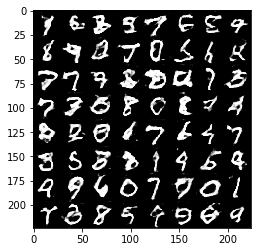

Epoch 1/2... Step: 1410... Discriminator Loss: 1.2326... Generator Loss: 0.8050
Epoch 1/2... Step: 1420... Discriminator Loss: 1.3258... Generator Loss: 1.6295
Epoch 1/2... Step: 1430... Discriminator Loss: 0.9989... Generator Loss: 1.2683
Epoch 1/2... Step: 1440... Discriminator Loss: 1.0157... Generator Loss: 1.3084
Epoch 1/2... Step: 1450... Discriminator Loss: 0.9727... Generator Loss: 1.5312
Epoch 1/2... Step: 1460... Discriminator Loss: 1.0745... Generator Loss: 1.1644
Epoch 1/2... Step: 1470... Discriminator Loss: 1.2511... Generator Loss: 0.8551
Epoch 1/2... Step: 1480... Discriminator Loss: 1.1763... Generator Loss: 1.1143
Epoch 1/2... Step: 1490... Discriminator Loss: 1.1699... Generator Loss: 1.1826
Epoch 1/2... Step: 1500... Discriminator Loss: 1.0847... Generator Loss: 1.2701


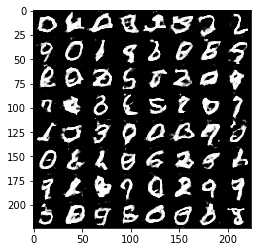

Epoch 1/2... Step: 1510... Discriminator Loss: 1.1207... Generator Loss: 1.3293
Epoch 1/2... Step: 1520... Discriminator Loss: 1.1083... Generator Loss: 1.2984
Epoch 1/2... Step: 1530... Discriminator Loss: 1.0866... Generator Loss: 1.4059
Epoch 1/2... Step: 1540... Discriminator Loss: 1.1118... Generator Loss: 0.9569
Epoch 1/2... Step: 1550... Discriminator Loss: 1.1525... Generator Loss: 0.8040
Epoch 1/2... Step: 1560... Discriminator Loss: 1.0115... Generator Loss: 1.3533
Epoch 1/2... Step: 1570... Discriminator Loss: 1.0859... Generator Loss: 1.1358
Epoch 1/2... Step: 1580... Discriminator Loss: 1.1212... Generator Loss: 0.9831
Epoch 1/2... Step: 1590... Discriminator Loss: 1.3553... Generator Loss: 0.8153
Epoch 1/2... Step: 1600... Discriminator Loss: 1.1279... Generator Loss: 1.0169


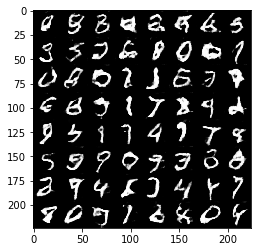

Epoch 1/2... Step: 1610... Discriminator Loss: 1.1479... Generator Loss: 1.1800
Epoch 1/2... Step: 1620... Discriminator Loss: 1.1635... Generator Loss: 1.0987
Epoch 1/2... Step: 1630... Discriminator Loss: 1.3161... Generator Loss: 0.7541
Epoch 1/2... Step: 1640... Discriminator Loss: 1.1380... Generator Loss: 1.2174
Epoch 1/2... Step: 1650... Discriminator Loss: 1.0497... Generator Loss: 1.0249
Epoch 1/2... Step: 1660... Discriminator Loss: 1.1406... Generator Loss: 0.9745
Epoch 1/2... Step: 1670... Discriminator Loss: 1.5012... Generator Loss: 0.5431
Epoch 1/2... Step: 1680... Discriminator Loss: 1.0797... Generator Loss: 1.6243
Epoch 1/2... Step: 1690... Discriminator Loss: 1.1110... Generator Loss: 1.1055
Epoch 1/2... Step: 1700... Discriminator Loss: 1.3654... Generator Loss: 0.6656


Epoch 1/2... Step: 1710... Discriminator Loss: 1.2948... Generator Loss: 0.9055
Epoch 1/2... Step: 1720... Discriminator Loss: 1.1319... Generator Loss: 0.9649
Epoch 1/2... Step: 1730... Discriminator Loss: 1.0571... Generator Loss: 1.0821
Epoch 1/2... Step: 1740... Discriminator Loss: 1.0897... Generator Loss: 1.2897
Epoch 1/2... Step: 1750... Discriminator Loss: 1.0802... Generator Loss: 1.3956
Epoch 1/2... Step: 1760... Discriminator Loss: 1.0379... Generator Loss: 1.2224
Epoch 1/2... Step: 1770... Discriminator Loss: 1.1581... Generator Loss: 0.9237
Epoch 1/2... Step: 1780... Discriminator Loss: 1.4696... Generator Loss: 0.6397
Epoch 1/2... Step: 1790... Discriminator Loss: 1.0532... Generator Loss: 1.4075
Epoch 1/2... Step: 1800... Discriminator Loss: 1.0990... Generator Loss: 1.6238


Epoch 1/2... Step: 1810... Discriminator Loss: 1.0816... Generator Loss: 1.2244
Epoch 1/2... Step: 1820... Discriminator Loss: 1.1731... Generator Loss: 0.8461
Epoch 1/2... Step: 1830... Discriminator Loss: 1.4963... Generator Loss: 0.6210
Epoch 1/2... Step: 1840... Discriminator Loss: 1.1895... Generator Loss: 1.0675
Epoch 1/2... Step: 1850... Discriminator Loss: 1.3161... Generator Loss: 1.6609
Epoch 1/2... Step: 1860... Discriminator Loss: 1.1454... Generator Loss: 1.5725
Epoch 1/2... Step: 1870... Discriminator Loss: 1.1125... Generator Loss: 0.9129


In [32]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Step: 10... Discriminator Loss: 1.8121... Generator Loss: 1.8703
Epoch 0/1... Step: 20... Discriminator Loss: 1.7009... Generator Loss: 1.8595
Epoch 0/1... Step: 30... Discriminator Loss: 3.8898... Generator Loss: 0.4390
Epoch 0/1... Step: 40... Discriminator Loss: 2.7722... Generator Loss: 0.6810
Epoch 0/1... Step: 50... Discriminator Loss: 1.4394... Generator Loss: 1.8856
Epoch 0/1... Step: 60... Discriminator Loss: 1.6364... Generator Loss: 0.9895
Epoch 0/1... Step: 70... Discriminator Loss: 1.5515... Generator Loss: 0.7243
Epoch 0/1... Step: 80... Discriminator Loss: 1.3501... Generator Loss: 1.3307
Epoch 0/1... Step: 90... Discriminator Loss: 1.5819... Generator Loss: 0.6616
Epoch 0/1... Step: 100... Discriminator Loss: 1.3072... Generator Loss: 1.3137


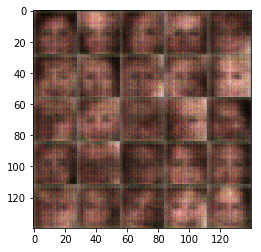

Epoch 0/1... Step: 110... Discriminator Loss: 1.6276... Generator Loss: 0.7639
Epoch 0/1... Step: 120... Discriminator Loss: 1.3583... Generator Loss: 0.8896
Epoch 0/1... Step: 130... Discriminator Loss: 1.8168... Generator Loss: 0.5163
Epoch 0/1... Step: 140... Discriminator Loss: 1.4072... Generator Loss: 1.2223
Epoch 0/1... Step: 150... Discriminator Loss: 2.5557... Generator Loss: 2.6428
Epoch 0/1... Step: 160... Discriminator Loss: 1.4075... Generator Loss: 1.0448
Epoch 0/1... Step: 170... Discriminator Loss: 1.0054... Generator Loss: 1.4479
Epoch 0/1... Step: 180... Discriminator Loss: 1.7659... Generator Loss: 0.5111
Epoch 0/1... Step: 190... Discriminator Loss: 1.1838... Generator Loss: 1.1469
Epoch 0/1... Step: 200... Discriminator Loss: 1.5839... Generator Loss: 0.9737


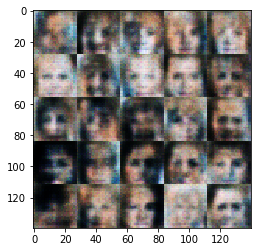

Epoch 0/1... Step: 210... Discriminator Loss: 1.3724... Generator Loss: 1.4713
Epoch 0/1... Step: 220... Discriminator Loss: 0.9707... Generator Loss: 3.7070
Epoch 0/1... Step: 230... Discriminator Loss: 1.3984... Generator Loss: 1.1768
Epoch 0/1... Step: 240... Discriminator Loss: 1.2496... Generator Loss: 0.9770
Epoch 0/1... Step: 250... Discriminator Loss: 1.5270... Generator Loss: 0.6509
Epoch 0/1... Step: 260... Discriminator Loss: 1.0243... Generator Loss: 1.8808
Epoch 0/1... Step: 270... Discriminator Loss: 1.2608... Generator Loss: 1.3771
Epoch 0/1... Step: 280... Discriminator Loss: 4.4182... Generator Loss: 3.1637
Epoch 0/1... Step: 290... Discriminator Loss: 1.2489... Generator Loss: 1.5197
Epoch 0/1... Step: 300... Discriminator Loss: 1.4839... Generator Loss: 1.5190


Epoch 0/1... Step: 310... Discriminator Loss: 1.1089... Generator Loss: 1.8549
Epoch 0/1... Step: 320... Discriminator Loss: 2.2775... Generator Loss: 0.3702
Epoch 0/1... Step: 330... Discriminator Loss: 1.3043... Generator Loss: 3.7835
Epoch 0/1... Step: 340... Discriminator Loss: 1.5093... Generator Loss: 1.9127
Epoch 0/1... Step: 350... Discriminator Loss: 1.6594... Generator Loss: 1.1075
Epoch 0/1... Step: 360... Discriminator Loss: 1.4486... Generator Loss: 0.5511
Epoch 0/1... Step: 370... Discriminator Loss: 1.2041... Generator Loss: 1.1953
Epoch 0/1... Step: 380... Discriminator Loss: 1.3973... Generator Loss: 1.6494
Epoch 0/1... Step: 390... Discriminator Loss: 0.8843... Generator Loss: 2.4554
Epoch 0/1... Step: 400... Discriminator Loss: 0.9655... Generator Loss: 2.8212


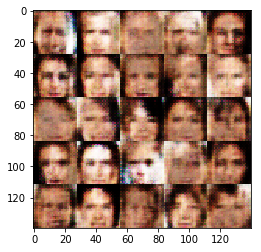

Epoch 0/1... Step: 410... Discriminator Loss: 1.3676... Generator Loss: 0.6730
Epoch 0/1... Step: 420... Discriminator Loss: 1.0939... Generator Loss: 1.0573
Epoch 0/1... Step: 430... Discriminator Loss: 1.2161... Generator Loss: 1.6807
Epoch 0/1... Step: 440... Discriminator Loss: 1.4668... Generator Loss: 0.9165
Epoch 0/1... Step: 450... Discriminator Loss: 1.3872... Generator Loss: 1.0163
Epoch 0/1... Step: 460... Discriminator Loss: 1.2473... Generator Loss: 0.7263
Epoch 0/1... Step: 470... Discriminator Loss: 1.1589... Generator Loss: 1.0214
Epoch 0/1... Step: 480... Discriminator Loss: 1.4468... Generator Loss: 0.6549
Epoch 0/1... Step: 490... Discriminator Loss: 1.2308... Generator Loss: 2.1173
Epoch 0/1... Step: 500... Discriminator Loss: 1.3406... Generator Loss: 0.9221


Epoch 0/1... Step: 510... Discriminator Loss: 1.0516... Generator Loss: 1.1001
Epoch 0/1... Step: 520... Discriminator Loss: 1.4812... Generator Loss: 0.5282
Epoch 0/1... Step: 530... Discriminator Loss: 1.2497... Generator Loss: 0.9087
Epoch 0/1... Step: 540... Discriminator Loss: 1.5629... Generator Loss: 0.6825
Epoch 0/1... Step: 550... Discriminator Loss: 1.1847... Generator Loss: 0.9942
Epoch 0/1... Step: 560... Discriminator Loss: 1.3654... Generator Loss: 1.3599
Epoch 0/1... Step: 570... Discriminator Loss: 1.3432... Generator Loss: 1.0381
Epoch 0/1... Step: 580... Discriminator Loss: 1.4125... Generator Loss: 0.9968
Epoch 0/1... Step: 590... Discriminator Loss: 1.1665... Generator Loss: 1.0263
Epoch 0/1... Step: 600... Discriminator Loss: 1.2901... Generator Loss: 0.6674


Epoch 0/1... Step: 610... Discriminator Loss: 1.3604... Generator Loss: 0.6242
Epoch 0/1... Step: 620... Discriminator Loss: 1.3575... Generator Loss: 0.6648
Epoch 0/1... Step: 630... Discriminator Loss: 1.2384... Generator Loss: 0.7487
Epoch 0/1... Step: 640... Discriminator Loss: 1.4203... Generator Loss: 0.6610
Epoch 0/1... Step: 650... Discriminator Loss: 1.4108... Generator Loss: 0.6857
Epoch 0/1... Step: 660... Discriminator Loss: 1.0908... Generator Loss: 1.2269
Epoch 0/1... Step: 670... Discriminator Loss: 1.0167... Generator Loss: 2.0488
Epoch 0/1... Step: 680... Discriminator Loss: 1.3267... Generator Loss: 0.7804
Epoch 0/1... Step: 690... Discriminator Loss: 1.3306... Generator Loss: 0.7535
Epoch 0/1... Step: 700... Discriminator Loss: 1.3060... Generator Loss: 1.6493


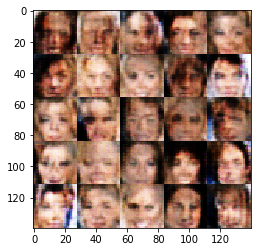

Epoch 0/1... Step: 710... Discriminator Loss: 1.4207... Generator Loss: 1.3255
Epoch 0/1... Step: 720... Discriminator Loss: 1.1686... Generator Loss: 1.0990
Epoch 0/1... Step: 730... Discriminator Loss: 0.9660... Generator Loss: 2.4233
Epoch 0/1... Step: 740... Discriminator Loss: 0.8359... Generator Loss: 3.6864
Epoch 0/1... Step: 750... Discriminator Loss: 1.2527... Generator Loss: 1.1094
Epoch 0/1... Step: 760... Discriminator Loss: 1.3198... Generator Loss: 0.9657
Epoch 0/1... Step: 770... Discriminator Loss: 1.5217... Generator Loss: 0.5751
Epoch 0/1... Step: 780... Discriminator Loss: 1.4183... Generator Loss: 0.8826
Epoch 0/1... Step: 790... Discriminator Loss: 1.1211... Generator Loss: 0.9957
Epoch 0/1... Step: 800... Discriminator Loss: 1.1407... Generator Loss: 1.1141


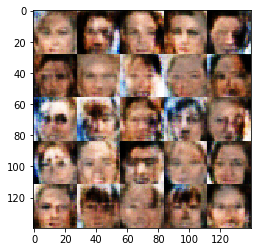

Epoch 0/1... Step: 810... Discriminator Loss: 1.2814... Generator Loss: 0.7496
Epoch 0/1... Step: 820... Discriminator Loss: 1.1089... Generator Loss: 1.6961
Epoch 0/1... Step: 830... Discriminator Loss: 1.4380... Generator Loss: 3.8594
Epoch 0/1... Step: 840... Discriminator Loss: 1.2831... Generator Loss: 0.7772
Epoch 0/1... Step: 850... Discriminator Loss: 1.5065... Generator Loss: 0.8754
Epoch 0/1... Step: 860... Discriminator Loss: 1.4209... Generator Loss: 1.0967
Epoch 0/1... Step: 870... Discriminator Loss: 1.4506... Generator Loss: 0.6921
Epoch 0/1... Step: 880... Discriminator Loss: 1.5015... Generator Loss: 0.6036
Epoch 0/1... Step: 890... Discriminator Loss: 1.3293... Generator Loss: 0.7606
Epoch 0/1... Step: 900... Discriminator Loss: 1.1486... Generator Loss: 0.8277


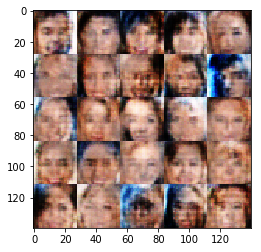

Epoch 0/1... Step: 910... Discriminator Loss: 1.2898... Generator Loss: 0.9520
Epoch 0/1... Step: 920... Discriminator Loss: 1.3041... Generator Loss: 0.7518
Epoch 0/1... Step: 930... Discriminator Loss: 1.3096... Generator Loss: 0.8777
Epoch 0/1... Step: 940... Discriminator Loss: 1.4600... Generator Loss: 1.4475
Epoch 0/1... Step: 950... Discriminator Loss: 1.3358... Generator Loss: 0.7948
Epoch 0/1... Step: 960... Discriminator Loss: 1.2664... Generator Loss: 0.7975
Epoch 0/1... Step: 970... Discriminator Loss: 1.0135... Generator Loss: 2.0566
Epoch 0/1... Step: 980... Discriminator Loss: 1.5501... Generator Loss: 0.6766
Epoch 0/1... Step: 990... Discriminator Loss: 1.3673... Generator Loss: 0.7365
Epoch 0/1... Step: 1000... Discriminator Loss: 1.3488... Generator Loss: 0.7067


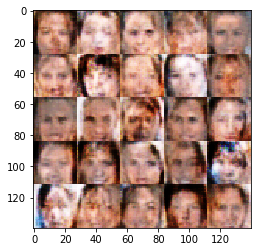

Epoch 0/1... Step: 1010... Discriminator Loss: 1.2152... Generator Loss: 1.2274
Epoch 0/1... Step: 1020... Discriminator Loss: 1.4166... Generator Loss: 0.6590
Epoch 0/1... Step: 1030... Discriminator Loss: 1.3738... Generator Loss: 0.8459
Epoch 0/1... Step: 1040... Discriminator Loss: 1.4681... Generator Loss: 0.9492
Epoch 0/1... Step: 1050... Discriminator Loss: 1.4754... Generator Loss: 1.0488
Epoch 0/1... Step: 1060... Discriminator Loss: 1.2019... Generator Loss: 0.7422
Epoch 0/1... Step: 1070... Discriminator Loss: 1.2240... Generator Loss: 0.7924
Epoch 0/1... Step: 1080... Discriminator Loss: 1.0936... Generator Loss: 1.2601
Epoch 0/1... Step: 1090... Discriminator Loss: 1.2053... Generator Loss: 1.0200
Epoch 0/1... Step: 1100... Discriminator Loss: 1.2314... Generator Loss: 0.9876


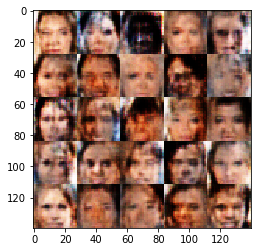

Epoch 0/1... Step: 1110... Discriminator Loss: 1.3304... Generator Loss: 0.8796
Epoch 0/1... Step: 1120... Discriminator Loss: 1.4604... Generator Loss: 0.6541
Epoch 0/1... Step: 1130... Discriminator Loss: 1.3283... Generator Loss: 0.6527
Epoch 0/1... Step: 1140... Discriminator Loss: 1.3551... Generator Loss: 0.7010
Epoch 0/1... Step: 1150... Discriminator Loss: 1.4834... Generator Loss: 0.6203
Epoch 0/1... Step: 1160... Discriminator Loss: 1.2079... Generator Loss: 0.8776
Epoch 0/1... Step: 1170... Discriminator Loss: 1.3630... Generator Loss: 1.1590
Epoch 0/1... Step: 1180... Discriminator Loss: 1.2960... Generator Loss: 0.6912
Epoch 0/1... Step: 1190... Discriminator Loss: 1.3758... Generator Loss: 0.7180
Epoch 0/1... Step: 1200... Discriminator Loss: 1.3147... Generator Loss: 1.0612


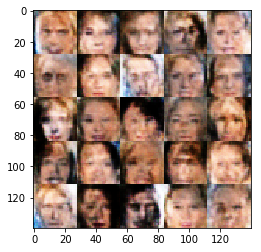

Epoch 0/1... Step: 1210... Discriminator Loss: 1.2952... Generator Loss: 1.0656
Epoch 0/1... Step: 1220... Discriminator Loss: 1.2757... Generator Loss: 0.7783
Epoch 0/1... Step: 1230... Discriminator Loss: 1.3015... Generator Loss: 0.7759
Epoch 0/1... Step: 1240... Discriminator Loss: 1.5255... Generator Loss: 1.5079
Epoch 0/1... Step: 1250... Discriminator Loss: 1.1515... Generator Loss: 1.5504
Epoch 0/1... Step: 1260... Discriminator Loss: 1.0589... Generator Loss: 1.6992
Epoch 0/1... Step: 1270... Discriminator Loss: 1.2443... Generator Loss: 0.6735
Epoch 0/1... Step: 1280... Discriminator Loss: 1.4695... Generator Loss: 0.7327
Epoch 0/1... Step: 1290... Discriminator Loss: 1.5289... Generator Loss: 0.5451
Epoch 0/1... Step: 1300... Discriminator Loss: 1.6329... Generator Loss: 1.2411


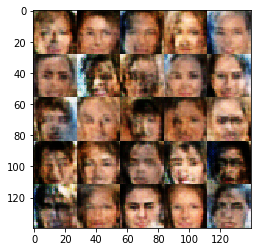

Epoch 0/1... Step: 1310... Discriminator Loss: 1.4639... Generator Loss: 0.6029
Epoch 0/1... Step: 1320... Discriminator Loss: 1.3472... Generator Loss: 0.8935
Epoch 0/1... Step: 1330... Discriminator Loss: 1.4009... Generator Loss: 1.1726
Epoch 0/1... Step: 1340... Discriminator Loss: 1.4727... Generator Loss: 0.6806
Epoch 0/1... Step: 1350... Discriminator Loss: 1.7942... Generator Loss: 0.7238
Epoch 0/1... Step: 1360... Discriminator Loss: 1.5092... Generator Loss: 1.6200
Epoch 0/1... Step: 1370... Discriminator Loss: 1.4913... Generator Loss: 0.6051
Epoch 0/1... Step: 1380... Discriminator Loss: 1.2985... Generator Loss: 0.7295
Epoch 0/1... Step: 1390... Discriminator Loss: 1.4929... Generator Loss: 0.5947
Epoch 0/1... Step: 1400... Discriminator Loss: 1.3642... Generator Loss: 0.6082


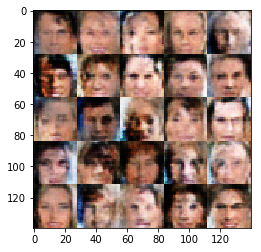

Epoch 0/1... Step: 1410... Discriminator Loss: 1.5306... Generator Loss: 0.5152
Epoch 0/1... Step: 1420... Discriminator Loss: 1.3802... Generator Loss: 0.7150
Epoch 0/1... Step: 1430... Discriminator Loss: 1.2393... Generator Loss: 0.7671
Epoch 0/1... Step: 1440... Discriminator Loss: 1.2517... Generator Loss: 0.8184
Epoch 0/1... Step: 1450... Discriminator Loss: 1.2951... Generator Loss: 0.7244
Epoch 0/1... Step: 1460... Discriminator Loss: 1.3087... Generator Loss: 0.7460
Epoch 0/1... Step: 1470... Discriminator Loss: 1.3604... Generator Loss: 0.8513
Epoch 0/1... Step: 1480... Discriminator Loss: 1.2144... Generator Loss: 0.7480
Epoch 0/1... Step: 1490... Discriminator Loss: 1.1995... Generator Loss: 1.3975
Epoch 0/1... Step: 1500... Discriminator Loss: 1.0783... Generator Loss: 1.5148


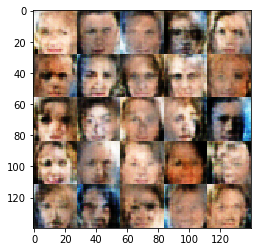

Epoch 0/1... Step: 1510... Discriminator Loss: 1.4469... Generator Loss: 0.5649
Epoch 0/1... Step: 1520... Discriminator Loss: 1.2581... Generator Loss: 0.8272
Epoch 0/1... Step: 1530... Discriminator Loss: 1.2286... Generator Loss: 0.8549
Epoch 0/1... Step: 1540... Discriminator Loss: 1.2775... Generator Loss: 0.9673
Epoch 0/1... Step: 1550... Discriminator Loss: 1.4461... Generator Loss: 1.4215
Epoch 0/1... Step: 1560... Discriminator Loss: 1.4521... Generator Loss: 0.7816
Epoch 0/1... Step: 1570... Discriminator Loss: 1.1698... Generator Loss: 0.8428
Epoch 0/1... Step: 1580... Discriminator Loss: 1.3793... Generator Loss: 0.7914
Epoch 0/1... Step: 1590... Discriminator Loss: 1.4886... Generator Loss: 2.1843
Epoch 0/1... Step: 1600... Discriminator Loss: 1.6028... Generator Loss: 1.0244


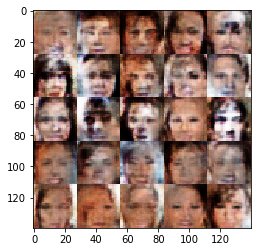

Epoch 0/1... Step: 1610... Discriminator Loss: 1.2524... Generator Loss: 0.8631
Epoch 0/1... Step: 1620... Discriminator Loss: 1.4492... Generator Loss: 0.8864
Epoch 0/1... Step: 1630... Discriminator Loss: 1.0970... Generator Loss: 1.4059
Epoch 0/1... Step: 1640... Discriminator Loss: 1.4373... Generator Loss: 0.8210
Epoch 0/1... Step: 1650... Discriminator Loss: 1.4066... Generator Loss: 0.7081
Epoch 0/1... Step: 1660... Discriminator Loss: 1.3858... Generator Loss: 0.7450
Epoch 0/1... Step: 1670... Discriminator Loss: 1.1599... Generator Loss: 0.8653
Epoch 0/1... Step: 1680... Discriminator Loss: 1.3968... Generator Loss: 0.8288
Epoch 0/1... Step: 1690... Discriminator Loss: 1.2107... Generator Loss: 0.9934
Epoch 0/1... Step: 1700... Discriminator Loss: 1.3248... Generator Loss: 0.6755


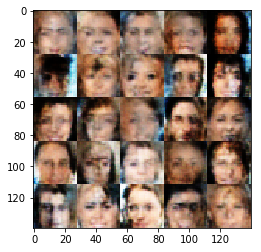

Epoch 0/1... Step: 1710... Discriminator Loss: 1.4042... Generator Loss: 0.9457
Epoch 0/1... Step: 1720... Discriminator Loss: 1.6683... Generator Loss: 0.4554
Epoch 0/1... Step: 1730... Discriminator Loss: 1.2433... Generator Loss: 1.2369
Epoch 0/1... Step: 1740... Discriminator Loss: 1.2889... Generator Loss: 0.6711
Epoch 0/1... Step: 1750... Discriminator Loss: 1.5551... Generator Loss: 1.2869
Epoch 0/1... Step: 1760... Discriminator Loss: 1.4780... Generator Loss: 0.7766
Epoch 0/1... Step: 1770... Discriminator Loss: 1.2126... Generator Loss: 0.9756
Epoch 0/1... Step: 1780... Discriminator Loss: 1.4293... Generator Loss: 0.7287
Epoch 0/1... Step: 1790... Discriminator Loss: 1.3678... Generator Loss: 0.7383
Epoch 0/1... Step: 1800... Discriminator Loss: 1.4290... Generator Loss: 0.7575


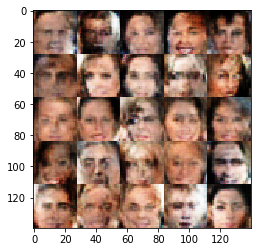

Epoch 0/1... Step: 1810... Discriminator Loss: 1.2459... Generator Loss: 0.8076
Epoch 0/1... Step: 1820... Discriminator Loss: 1.3180... Generator Loss: 0.7369
Epoch 0/1... Step: 1830... Discriminator Loss: 1.1379... Generator Loss: 2.4749
Epoch 0/1... Step: 1840... Discriminator Loss: 1.0463... Generator Loss: 1.2808
Epoch 0/1... Step: 1850... Discriminator Loss: 1.9071... Generator Loss: 0.5292
Epoch 0/1... Step: 1860... Discriminator Loss: 1.4176... Generator Loss: 0.8469
Epoch 0/1... Step: 1870... Discriminator Loss: 1.2522... Generator Loss: 1.1203
Epoch 0/1... Step: 1880... Discriminator Loss: 1.4856... Generator Loss: 0.6311
Epoch 0/1... Step: 1890... Discriminator Loss: 1.2303... Generator Loss: 0.8830
Epoch 0/1... Step: 1900... Discriminator Loss: 1.0894... Generator Loss: 1.0737


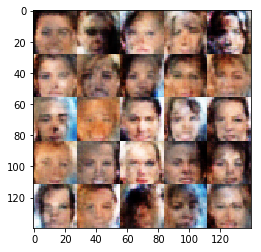

Epoch 0/1... Step: 1910... Discriminator Loss: 1.3252... Generator Loss: 0.6019
Epoch 0/1... Step: 1920... Discriminator Loss: 1.5090... Generator Loss: 0.5568
Epoch 0/1... Step: 1930... Discriminator Loss: 1.8318... Generator Loss: 0.5278
Epoch 0/1... Step: 1940... Discriminator Loss: 1.3189... Generator Loss: 1.2011
Epoch 0/1... Step: 1950... Discriminator Loss: 1.2254... Generator Loss: 0.7881
Epoch 0/1... Step: 1960... Discriminator Loss: 1.3888... Generator Loss: 0.8768
Epoch 0/1... Step: 1970... Discriminator Loss: 1.3827... Generator Loss: 0.6468
Epoch 0/1... Step: 1980... Discriminator Loss: 1.2809... Generator Loss: 1.0244
Epoch 0/1... Step: 1990... Discriminator Loss: 1.1813... Generator Loss: 1.1425
Epoch 0/1... Step: 2000... Discriminator Loss: 1.3259... Generator Loss: 0.9663


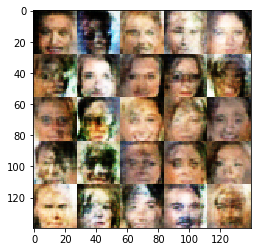

Epoch 0/1... Step: 2010... Discriminator Loss: 1.3373... Generator Loss: 0.8902
Epoch 0/1... Step: 2020... Discriminator Loss: 1.3914... Generator Loss: 0.6284
Epoch 0/1... Step: 2030... Discriminator Loss: 1.4174... Generator Loss: 0.6639
Epoch 0/1... Step: 2040... Discriminator Loss: 1.2819... Generator Loss: 0.8669
Epoch 0/1... Step: 2050... Discriminator Loss: 1.4257... Generator Loss: 0.9555
Epoch 0/1... Step: 2060... Discriminator Loss: 1.3225... Generator Loss: 1.0366
Epoch 0/1... Step: 2070... Discriminator Loss: 1.2067... Generator Loss: 1.7395
Epoch 0/1... Step: 2080... Discriminator Loss: 1.2439... Generator Loss: 0.7178
Epoch 0/1... Step: 2090... Discriminator Loss: 1.2768... Generator Loss: 0.7318
Epoch 0/1... Step: 2100... Discriminator Loss: 1.2487... Generator Loss: 0.7465


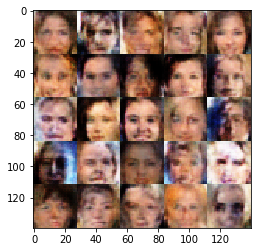

Epoch 0/1... Step: 2110... Discriminator Loss: 1.3460... Generator Loss: 0.9503
Epoch 0/1... Step: 2120... Discriminator Loss: 1.2979... Generator Loss: 0.9259
Epoch 0/1... Step: 2130... Discriminator Loss: 1.3985... Generator Loss: 1.7502
Epoch 0/1... Step: 2140... Discriminator Loss: 1.4107... Generator Loss: 0.5710
Epoch 0/1... Step: 2150... Discriminator Loss: 1.2088... Generator Loss: 0.8467
Epoch 0/1... Step: 2160... Discriminator Loss: 1.4864... Generator Loss: 1.4967
Epoch 0/1... Step: 2170... Discriminator Loss: 1.2967... Generator Loss: 0.8515
Epoch 0/1... Step: 2180... Discriminator Loss: 1.0947... Generator Loss: 1.0134
Epoch 0/1... Step: 2190... Discriminator Loss: 1.0204... Generator Loss: 1.4407
Epoch 0/1... Step: 2200... Discriminator Loss: 1.1765... Generator Loss: 1.3411


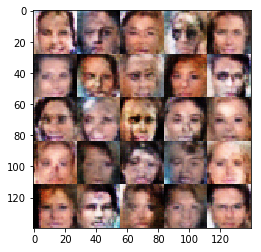

Epoch 0/1... Step: 2210... Discriminator Loss: 1.2625... Generator Loss: 1.1043
Epoch 0/1... Step: 2220... Discriminator Loss: 1.3886... Generator Loss: 0.7199
Epoch 0/1... Step: 2230... Discriminator Loss: 1.3768... Generator Loss: 0.8373
Epoch 0/1... Step: 2240... Discriminator Loss: 1.2761... Generator Loss: 0.7785
Epoch 0/1... Step: 2250... Discriminator Loss: 1.5871... Generator Loss: 0.7435
Epoch 0/1... Step: 2260... Discriminator Loss: 1.4484... Generator Loss: 0.5297
Epoch 0/1... Step: 2270... Discriminator Loss: 1.2786... Generator Loss: 0.8358
Epoch 0/1... Step: 2280... Discriminator Loss: 1.1720... Generator Loss: 0.9105
Epoch 0/1... Step: 2290... Discriminator Loss: 1.4770... Generator Loss: 0.9247
Epoch 0/1... Step: 2300... Discriminator Loss: 1.3148... Generator Loss: 0.7430


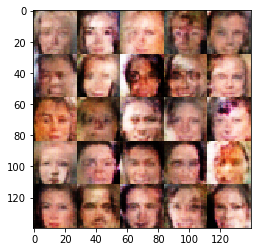

Epoch 0/1... Step: 2310... Discriminator Loss: 1.2790... Generator Loss: 0.6567
Epoch 0/1... Step: 2320... Discriminator Loss: 1.1980... Generator Loss: 0.8521
Epoch 0/1... Step: 2330... Discriminator Loss: 1.3554... Generator Loss: 0.7543
Epoch 0/1... Step: 2340... Discriminator Loss: 1.2349... Generator Loss: 1.2928
Epoch 0/1... Step: 2350... Discriminator Loss: 1.2664... Generator Loss: 0.9591
Epoch 0/1... Step: 2360... Discriminator Loss: 1.1968... Generator Loss: 0.7016
Epoch 0/1... Step: 2370... Discriminator Loss: 1.1884... Generator Loss: 0.9830
Epoch 0/1... Step: 2380... Discriminator Loss: 1.5031... Generator Loss: 0.7746
Epoch 0/1... Step: 2390... Discriminator Loss: 1.2677... Generator Loss: 0.9445
Epoch 0/1... Step: 2400... Discriminator Loss: 1.3222... Generator Loss: 0.8880


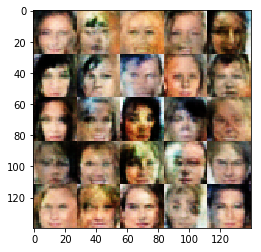

Epoch 0/1... Step: 2410... Discriminator Loss: 1.2829... Generator Loss: 0.8081
Epoch 0/1... Step: 2420... Discriminator Loss: 1.3777... Generator Loss: 0.6445
Epoch 0/1... Step: 2430... Discriminator Loss: 1.2216... Generator Loss: 1.0085
Epoch 0/1... Step: 2440... Discriminator Loss: 1.2663... Generator Loss: 1.0178
Epoch 0/1... Step: 2450... Discriminator Loss: 1.1105... Generator Loss: 1.5220
Epoch 0/1... Step: 2460... Discriminator Loss: 1.4607... Generator Loss: 0.6325
Epoch 0/1... Step: 2470... Discriminator Loss: 1.0671... Generator Loss: 1.2048
Epoch 0/1... Step: 2480... Discriminator Loss: 1.1956... Generator Loss: 1.0824
Epoch 0/1... Step: 2490... Discriminator Loss: 1.2973... Generator Loss: 0.6952
Epoch 0/1... Step: 2500... Discriminator Loss: 1.2890... Generator Loss: 0.6556


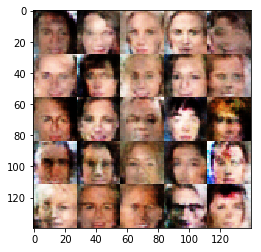

Epoch 0/1... Step: 2510... Discriminator Loss: 1.2086... Generator Loss: 0.7653
Epoch 0/1... Step: 2520... Discriminator Loss: 1.3366... Generator Loss: 0.8391
Epoch 0/1... Step: 2530... Discriminator Loss: 1.2609... Generator Loss: 0.9918
Epoch 0/1... Step: 2540... Discriminator Loss: 1.3082... Generator Loss: 0.8499
Epoch 0/1... Step: 2550... Discriminator Loss: 1.3484... Generator Loss: 0.8148
Epoch 0/1... Step: 2560... Discriminator Loss: 1.2928... Generator Loss: 0.8193
Epoch 0/1... Step: 2570... Discriminator Loss: 1.2749... Generator Loss: 0.7813
Epoch 0/1... Step: 2580... Discriminator Loss: 1.2699... Generator Loss: 0.7816
Epoch 0/1... Step: 2590... Discriminator Loss: 1.2535... Generator Loss: 1.0329
Epoch 0/1... Step: 2600... Discriminator Loss: 1.4728... Generator Loss: 0.6408


Epoch 0/1... Step: 2610... Discriminator Loss: 1.7622... Generator Loss: 1.6746
Epoch 0/1... Step: 2620... Discriminator Loss: 1.4202... Generator Loss: 1.1458
Epoch 0/1... Step: 2630... Discriminator Loss: 1.1704... Generator Loss: 1.0402
Epoch 0/1... Step: 2640... Discriminator Loss: 1.5618... Generator Loss: 0.6506
Epoch 0/1... Step: 2650... Discriminator Loss: 1.2563... Generator Loss: 0.7866
Epoch 0/1... Step: 2660... Discriminator Loss: 1.1740... Generator Loss: 1.1477
Epoch 0/1... Step: 2670... Discriminator Loss: 1.7669... Generator Loss: 1.0654
Epoch 0/1... Step: 2680... Discriminator Loss: 1.4428... Generator Loss: 0.7576
Epoch 0/1... Step: 2690... Discriminator Loss: 1.2099... Generator Loss: 1.1988
Epoch 0/1... Step: 2700... Discriminator Loss: 1.4175... Generator Loss: 1.3382


Epoch 0/1... Step: 2710... Discriminator Loss: 1.2638... Generator Loss: 0.8798
Epoch 0/1... Step: 2720... Discriminator Loss: 1.0813... Generator Loss: 1.5534
Epoch 0/1... Step: 2730... Discriminator Loss: 1.3091... Generator Loss: 0.7284
Epoch 0/1... Step: 2740... Discriminator Loss: 1.3943... Generator Loss: 1.0353
Epoch 0/1... Step: 2750... Discriminator Loss: 1.3182... Generator Loss: 0.7145
Epoch 0/1... Step: 2760... Discriminator Loss: 1.2680... Generator Loss: 1.2453
Epoch 0/1... Step: 2770... Discriminator Loss: 1.2776... Generator Loss: 0.7821
Epoch 0/1... Step: 2780... Discriminator Loss: 1.4470... Generator Loss: 0.7256
Epoch 0/1... Step: 2790... Discriminator Loss: 1.3991... Generator Loss: 1.2209
Epoch 0/1... Step: 2800... Discriminator Loss: 1.3613... Generator Loss: 0.7320


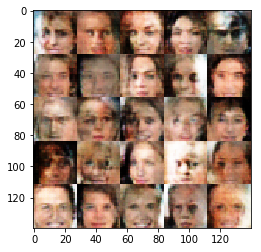

Epoch 0/1... Step: 2810... Discriminator Loss: 1.1772... Generator Loss: 0.8822
Epoch 0/1... Step: 2820... Discriminator Loss: 1.2996... Generator Loss: 0.9381
Epoch 0/1... Step: 2830... Discriminator Loss: 1.3054... Generator Loss: 0.7153
Epoch 0/1... Step: 2840... Discriminator Loss: 1.3515... Generator Loss: 0.7941
Epoch 0/1... Step: 2850... Discriminator Loss: 1.4294... Generator Loss: 0.9093
Epoch 0/1... Step: 2860... Discriminator Loss: 1.1275... Generator Loss: 1.1267
Epoch 0/1... Step: 2870... Discriminator Loss: 1.3095... Generator Loss: 0.9120
Epoch 0/1... Step: 2880... Discriminator Loss: 1.4668... Generator Loss: 0.6097
Epoch 0/1... Step: 2890... Discriminator Loss: 1.5936... Generator Loss: 0.5008
Epoch 0/1... Step: 2900... Discriminator Loss: 1.1176... Generator Loss: 1.0680


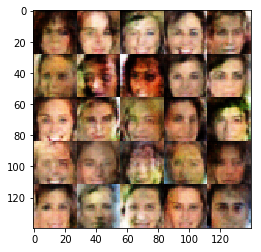

Epoch 0/1... Step: 2910... Discriminator Loss: 1.3426... Generator Loss: 0.7746
Epoch 0/1... Step: 2920... Discriminator Loss: 1.1355... Generator Loss: 0.9984
Epoch 0/1... Step: 2930... Discriminator Loss: 1.2700... Generator Loss: 1.1366
Epoch 0/1... Step: 2940... Discriminator Loss: 1.5649... Generator Loss: 1.3794
Epoch 0/1... Step: 2950... Discriminator Loss: 1.4201... Generator Loss: 1.0596
Epoch 0/1... Step: 2960... Discriminator Loss: 1.3068... Generator Loss: 0.8078
Epoch 0/1... Step: 2970... Discriminator Loss: 1.3271... Generator Loss: 0.7510
Epoch 0/1... Step: 2980... Discriminator Loss: 1.2032... Generator Loss: 0.8883
Epoch 0/1... Step: 2990... Discriminator Loss: 1.3668... Generator Loss: 0.7912
Epoch 0/1... Step: 3000... Discriminator Loss: 1.1737... Generator Loss: 0.9142


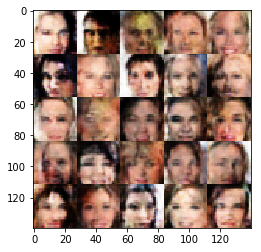

Epoch 0/1... Step: 3010... Discriminator Loss: 1.3532... Generator Loss: 1.4805
Epoch 0/1... Step: 3020... Discriminator Loss: 1.2798... Generator Loss: 0.8114
Epoch 0/1... Step: 3030... Discriminator Loss: 1.1584... Generator Loss: 0.9122
Epoch 0/1... Step: 3040... Discriminator Loss: 0.9798... Generator Loss: 2.6010
Epoch 0/1... Step: 3050... Discriminator Loss: 1.2265... Generator Loss: 1.0707
Epoch 0/1... Step: 3060... Discriminator Loss: 1.4999... Generator Loss: 1.0274
Epoch 0/1... Step: 3070... Discriminator Loss: 1.2612... Generator Loss: 1.0494
Epoch 0/1... Step: 3080... Discriminator Loss: 1.0925... Generator Loss: 1.0580
Epoch 0/1... Step: 3090... Discriminator Loss: 1.4378... Generator Loss: 0.7423
Epoch 0/1... Step: 3100... Discriminator Loss: 1.5877... Generator Loss: 0.4960


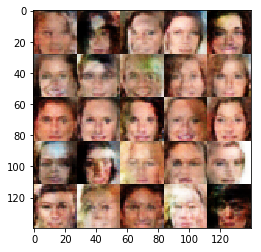

Epoch 0/1... Step: 3110... Discriminator Loss: 1.4448... Generator Loss: 0.6261
Epoch 0/1... Step: 3120... Discriminator Loss: 1.2440... Generator Loss: 0.8826
Epoch 0/1... Step: 3130... Discriminator Loss: 1.2816... Generator Loss: 1.0468
Epoch 0/1... Step: 3140... Discriminator Loss: 1.2471... Generator Loss: 0.9387
Epoch 0/1... Step: 3150... Discriminator Loss: 1.4854... Generator Loss: 0.5642
Epoch 0/1... Step: 3160... Discriminator Loss: 1.3188... Generator Loss: 0.9095
Epoch 0/1... Step: 3170... Discriminator Loss: 1.6521... Generator Loss: 0.5450
Epoch 0/1... Step: 3180... Discriminator Loss: 1.2813... Generator Loss: 0.8881
Epoch 0/1... Step: 3190... Discriminator Loss: 1.2780... Generator Loss: 0.7564
Epoch 0/1... Step: 3200... Discriminator Loss: 1.3739... Generator Loss: 0.9238


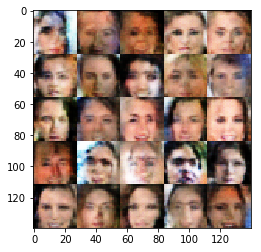

Epoch 0/1... Step: 3210... Discriminator Loss: 1.4084... Generator Loss: 0.8603
Epoch 0/1... Step: 3220... Discriminator Loss: 1.3023... Generator Loss: 0.8279
Epoch 0/1... Step: 3230... Discriminator Loss: 1.3550... Generator Loss: 0.8466
Epoch 0/1... Step: 3240... Discriminator Loss: 1.2944... Generator Loss: 0.7841
Epoch 0/1... Step: 3250... Discriminator Loss: 1.2146... Generator Loss: 1.1738
Epoch 0/1... Step: 3260... Discriminator Loss: 1.2460... Generator Loss: 1.2373
Epoch 0/1... Step: 3270... Discriminator Loss: 1.2260... Generator Loss: 1.1039
Epoch 0/1... Step: 3280... Discriminator Loss: 1.5387... Generator Loss: 0.5400
Epoch 0/1... Step: 3290... Discriminator Loss: 1.4222... Generator Loss: 0.7267
Epoch 0/1... Step: 3300... Discriminator Loss: 1.3319... Generator Loss: 0.7878


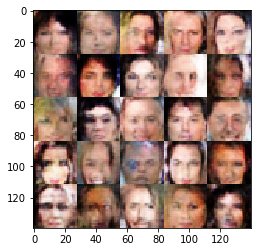

Epoch 0/1... Step: 3310... Discriminator Loss: 1.2654... Generator Loss: 0.9140
Epoch 0/1... Step: 3320... Discriminator Loss: 1.3125... Generator Loss: 0.9033
Epoch 0/1... Step: 3330... Discriminator Loss: 1.1784... Generator Loss: 1.1368
Epoch 0/1... Step: 3340... Discriminator Loss: 1.1549... Generator Loss: 1.1858
Epoch 0/1... Step: 3350... Discriminator Loss: 1.5421... Generator Loss: 0.8542
Epoch 0/1... Step: 3360... Discriminator Loss: 1.2334... Generator Loss: 0.9474
Epoch 0/1... Step: 3370... Discriminator Loss: 1.3450... Generator Loss: 0.6881
Epoch 0/1... Step: 3380... Discriminator Loss: 1.2147... Generator Loss: 0.9118
Epoch 0/1... Step: 3390... Discriminator Loss: 1.3782... Generator Loss: 0.8108
Epoch 0/1... Step: 3400... Discriminator Loss: 1.3912... Generator Loss: 0.6512


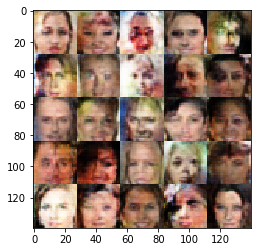

Epoch 0/1... Step: 3410... Discriminator Loss: 1.4728... Generator Loss: 0.7068
Epoch 0/1... Step: 3420... Discriminator Loss: 1.1862... Generator Loss: 1.3932
Epoch 0/1... Step: 3430... Discriminator Loss: 1.3576... Generator Loss: 1.1094
Epoch 0/1... Step: 3440... Discriminator Loss: 1.2011... Generator Loss: 1.0310
Epoch 0/1... Step: 3450... Discriminator Loss: 1.1052... Generator Loss: 1.6181
Epoch 0/1... Step: 3460... Discriminator Loss: 1.2189... Generator Loss: 0.9689
Epoch 0/1... Step: 3470... Discriminator Loss: 1.0997... Generator Loss: 1.2939
Epoch 0/1... Step: 3480... Discriminator Loss: 1.3570... Generator Loss: 1.2611
Epoch 0/1... Step: 3490... Discriminator Loss: 1.2383... Generator Loss: 1.1305
Epoch 0/1... Step: 3500... Discriminator Loss: 1.3851... Generator Loss: 0.7419


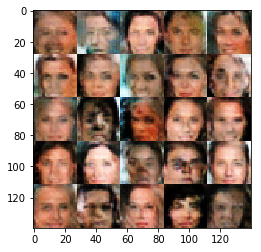

Epoch 0/1... Step: 3510... Discriminator Loss: 1.3065... Generator Loss: 0.9533
Epoch 0/1... Step: 3520... Discriminator Loss: 1.1839... Generator Loss: 0.8578
Epoch 0/1... Step: 3530... Discriminator Loss: 1.3607... Generator Loss: 1.1050
Epoch 0/1... Step: 3540... Discriminator Loss: 0.9706... Generator Loss: 1.5794
Epoch 0/1... Step: 3550... Discriminator Loss: 1.3342... Generator Loss: 1.1969
Epoch 0/1... Step: 3560... Discriminator Loss: 1.2864... Generator Loss: 0.8921
Epoch 0/1... Step: 3570... Discriminator Loss: 1.2974... Generator Loss: 0.6693
Epoch 0/1... Step: 3580... Discriminator Loss: 1.1786... Generator Loss: 0.9761
Epoch 0/1... Step: 3590... Discriminator Loss: 1.6851... Generator Loss: 1.3991
Epoch 0/1... Step: 3600... Discriminator Loss: 1.3297... Generator Loss: 0.9894


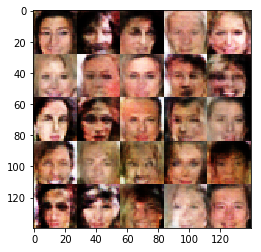

Epoch 0/1... Step: 3610... Discriminator Loss: 1.3874... Generator Loss: 0.7438
Epoch 0/1... Step: 3620... Discriminator Loss: 1.2788... Generator Loss: 0.9537
Epoch 0/1... Step: 3630... Discriminator Loss: 1.3220... Generator Loss: 0.7745
Epoch 0/1... Step: 3640... Discriminator Loss: 1.2345... Generator Loss: 0.9672
Epoch 0/1... Step: 3650... Discriminator Loss: 1.2380... Generator Loss: 1.2460
Epoch 0/1... Step: 3660... Discriminator Loss: 1.4588... Generator Loss: 0.6859
Epoch 0/1... Step: 3670... Discriminator Loss: 1.1975... Generator Loss: 0.9265
Epoch 0/1... Step: 3680... Discriminator Loss: 1.2872... Generator Loss: 1.0778
Epoch 0/1... Step: 3690... Discriminator Loss: 1.3149... Generator Loss: 0.7122
Epoch 0/1... Step: 3700... Discriminator Loss: 1.4706... Generator Loss: 0.8069


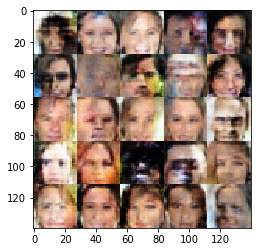

Epoch 0/1... Step: 3710... Discriminator Loss: 1.5103... Generator Loss: 0.5581
Epoch 0/1... Step: 3720... Discriminator Loss: 1.2420... Generator Loss: 1.2647
Epoch 0/1... Step: 3730... Discriminator Loss: 1.2780... Generator Loss: 0.7896
Epoch 0/1... Step: 3740... Discriminator Loss: 1.2447... Generator Loss: 1.0312
Epoch 0/1... Step: 3750... Discriminator Loss: 1.5514... Generator Loss: 0.8224
Epoch 0/1... Step: 3760... Discriminator Loss: 1.1789... Generator Loss: 1.1659
Epoch 0/1... Step: 3770... Discriminator Loss: 1.4674... Generator Loss: 0.6360
Epoch 0/1... Step: 3780... Discriminator Loss: 1.4329... Generator Loss: 0.9416
Epoch 0/1... Step: 3790... Discriminator Loss: 1.2195... Generator Loss: 0.7861
Epoch 0/1... Step: 3800... Discriminator Loss: 1.2455... Generator Loss: 1.0986


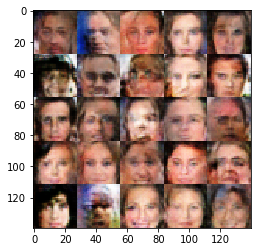

Epoch 0/1... Step: 3810... Discriminator Loss: 1.4656... Generator Loss: 0.9197
Epoch 0/1... Step: 3820... Discriminator Loss: 1.2291... Generator Loss: 0.8160
Epoch 0/1... Step: 3830... Discriminator Loss: 1.3946... Generator Loss: 0.9114
Epoch 0/1... Step: 3840... Discriminator Loss: 1.4107... Generator Loss: 0.9080
Epoch 0/1... Step: 3850... Discriminator Loss: 1.2006... Generator Loss: 0.9432
Epoch 0/1... Step: 3860... Discriminator Loss: 1.1740... Generator Loss: 1.3612
Epoch 0/1... Step: 3870... Discriminator Loss: 1.2568... Generator Loss: 0.6848
Epoch 0/1... Step: 3880... Discriminator Loss: 1.3967... Generator Loss: 0.8491
Epoch 0/1... Step: 3890... Discriminator Loss: 1.4764... Generator Loss: 0.8469
Epoch 0/1... Step: 3900... Discriminator Loss: 1.3156... Generator Loss: 0.5909


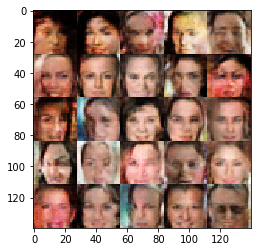

Epoch 0/1... Step: 3910... Discriminator Loss: 1.1114... Generator Loss: 1.9040
Epoch 0/1... Step: 3920... Discriminator Loss: 1.1963... Generator Loss: 0.8667
Epoch 0/1... Step: 3930... Discriminator Loss: 1.3451... Generator Loss: 0.7655
Epoch 0/1... Step: 3940... Discriminator Loss: 1.4078... Generator Loss: 0.7843
Epoch 0/1... Step: 3950... Discriminator Loss: 1.4241... Generator Loss: 0.7307
Epoch 0/1... Step: 3960... Discriminator Loss: 1.0817... Generator Loss: 1.5156
Epoch 0/1... Step: 3970... Discriminator Loss: 1.2539... Generator Loss: 0.8066
Epoch 0/1... Step: 3980... Discriminator Loss: 1.3807... Generator Loss: 0.8107
Epoch 0/1... Step: 3990... Discriminator Loss: 1.2833... Generator Loss: 0.9243
Epoch 0/1... Step: 4000... Discriminator Loss: 1.3583... Generator Loss: 1.3177


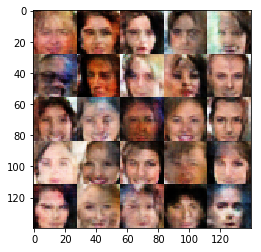

Epoch 0/1... Step: 4010... Discriminator Loss: 1.1684... Generator Loss: 1.1214
Epoch 0/1... Step: 4020... Discriminator Loss: 1.6505... Generator Loss: 0.4934
Epoch 0/1... Step: 4030... Discriminator Loss: 1.3759... Generator Loss: 0.6250
Epoch 0/1... Step: 4040... Discriminator Loss: 1.2965... Generator Loss: 0.6907
Epoch 0/1... Step: 4050... Discriminator Loss: 1.5843... Generator Loss: 0.5620
Epoch 0/1... Step: 4060... Discriminator Loss: 1.2529... Generator Loss: 0.8383
Epoch 0/1... Step: 4070... Discriminator Loss: 1.3705... Generator Loss: 0.6535
Epoch 0/1... Step: 4080... Discriminator Loss: 1.2650... Generator Loss: 0.7303
Epoch 0/1... Step: 4090... Discriminator Loss: 1.4958... Generator Loss: 0.8269
Epoch 0/1... Step: 4100... Discriminator Loss: 1.2376... Generator Loss: 0.9809


Epoch 0/1... Step: 4110... Discriminator Loss: 1.1944... Generator Loss: 0.9022
Epoch 0/1... Step: 4120... Discriminator Loss: 1.1141... Generator Loss: 0.7702
Epoch 0/1... Step: 4130... Discriminator Loss: 1.3098... Generator Loss: 0.7009
Epoch 0/1... Step: 4140... Discriminator Loss: 1.3365... Generator Loss: 0.6699
Epoch 0/1... Step: 4150... Discriminator Loss: 1.3934... Generator Loss: 0.7242
Epoch 0/1... Step: 4160... Discriminator Loss: 1.3271... Generator Loss: 0.6816
Epoch 0/1... Step: 4170... Discriminator Loss: 1.3027... Generator Loss: 0.7529
Epoch 0/1... Step: 4180... Discriminator Loss: 1.3083... Generator Loss: 0.8572
Epoch 0/1... Step: 4190... Discriminator Loss: 1.7404... Generator Loss: 0.5285
Epoch 0/1... Step: 4200... Discriminator Loss: 1.3531... Generator Loss: 1.1033


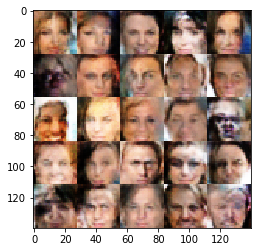

Epoch 0/1... Step: 4210... Discriminator Loss: 1.2418... Generator Loss: 0.8754
Epoch 0/1... Step: 4220... Discriminator Loss: 1.3132... Generator Loss: 0.9220
Epoch 0/1... Step: 4230... Discriminator Loss: 1.4377... Generator Loss: 0.7711
Epoch 0/1... Step: 4240... Discriminator Loss: 1.3081... Generator Loss: 0.7840
Epoch 0/1... Step: 4250... Discriminator Loss: 1.5194... Generator Loss: 0.8282
Epoch 0/1... Step: 4260... Discriminator Loss: 1.2586... Generator Loss: 0.7565
Epoch 0/1... Step: 4270... Discriminator Loss: 1.3171... Generator Loss: 0.6674
Epoch 0/1... Step: 4280... Discriminator Loss: 1.3300... Generator Loss: 0.6950
Epoch 0/1... Step: 4290... Discriminator Loss: 1.3143... Generator Loss: 1.0633
Epoch 0/1... Step: 4300... Discriminator Loss: 1.6612... Generator Loss: 0.5662


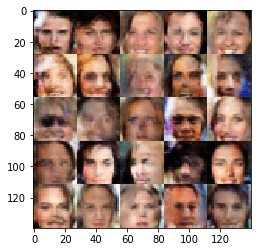

Epoch 0/1... Step: 4310... Discriminator Loss: 1.2619... Generator Loss: 1.0502
Epoch 0/1... Step: 4320... Discriminator Loss: 1.3261... Generator Loss: 1.0358
Epoch 0/1... Step: 4330... Discriminator Loss: 1.2371... Generator Loss: 0.8549
Epoch 0/1... Step: 4340... Discriminator Loss: 1.1947... Generator Loss: 1.0046
Epoch 0/1... Step: 4350... Discriminator Loss: 1.2352... Generator Loss: 0.9928
Epoch 0/1... Step: 4360... Discriminator Loss: 1.1451... Generator Loss: 0.8359
Epoch 0/1... Step: 4370... Discriminator Loss: 1.4693... Generator Loss: 0.7074
Epoch 0/1... Step: 4380... Discriminator Loss: 1.4459... Generator Loss: 0.8411
Epoch 0/1... Step: 4390... Discriminator Loss: 1.3696... Generator Loss: 0.6086
Epoch 0/1... Step: 4400... Discriminator Loss: 1.2125... Generator Loss: 0.8950


Epoch 0/1... Step: 4410... Discriminator Loss: 1.5005... Generator Loss: 0.6955
Epoch 0/1... Step: 4420... Discriminator Loss: 1.1498... Generator Loss: 1.2149
Epoch 0/1... Step: 4430... Discriminator Loss: 1.3658... Generator Loss: 0.6120
Epoch 0/1... Step: 4440... Discriminator Loss: 1.1991... Generator Loss: 1.0318
Epoch 0/1... Step: 4450... Discriminator Loss: 1.4590... Generator Loss: 0.7588
Epoch 0/1... Step: 4460... Discriminator Loss: 1.2700... Generator Loss: 0.9698
Epoch 0/1... Step: 4470... Discriminator Loss: 1.3052... Generator Loss: 1.0140
Epoch 0/1... Step: 4480... Discriminator Loss: 1.2838... Generator Loss: 0.7059
Epoch 0/1... Step: 4490... Discriminator Loss: 1.3545... Generator Loss: 0.9004
Epoch 0/1... Step: 4500... Discriminator Loss: 1.3776... Generator Loss: 0.8020


Epoch 0/1... Step: 4510... Discriminator Loss: 1.1151... Generator Loss: 1.3232
Epoch 0/1... Step: 4520... Discriminator Loss: 1.2798... Generator Loss: 0.8304
Epoch 0/1... Step: 4530... Discriminator Loss: 1.2279... Generator Loss: 0.8904
Epoch 0/1... Step: 4540... Discriminator Loss: 1.5711... Generator Loss: 0.7493
Epoch 0/1... Step: 4550... Discriminator Loss: 1.4981... Generator Loss: 0.8063
Epoch 0/1... Step: 4560... Discriminator Loss: 1.3649... Generator Loss: 0.6984
Epoch 0/1... Step: 4570... Discriminator Loss: 1.3853... Generator Loss: 0.9583
Epoch 0/1... Step: 4580... Discriminator Loss: 1.4205... Generator Loss: 0.7028
Epoch 0/1... Step: 4590... Discriminator Loss: 1.2503... Generator Loss: 0.7202
Epoch 0/1... Step: 4600... Discriminator Loss: 1.1426... Generator Loss: 1.0051


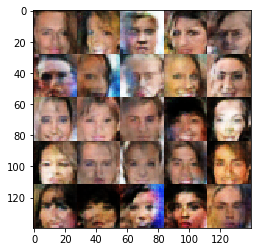

Epoch 0/1... Step: 4610... Discriminator Loss: 1.2122... Generator Loss: 0.9049
Epoch 0/1... Step: 4620... Discriminator Loss: 1.4418... Generator Loss: 0.5875
Epoch 0/1... Step: 4630... Discriminator Loss: 1.3974... Generator Loss: 0.8320
Epoch 0/1... Step: 4640... Discriminator Loss: 1.3197... Generator Loss: 0.8197
Epoch 0/1... Step: 4650... Discriminator Loss: 1.3449... Generator Loss: 0.9650
Epoch 0/1... Step: 4660... Discriminator Loss: 1.2083... Generator Loss: 0.8553
Epoch 0/1... Step: 4670... Discriminator Loss: 1.0613... Generator Loss: 1.6694
Epoch 0/1... Step: 4680... Discriminator Loss: 1.2022... Generator Loss: 0.9376
Epoch 0/1... Step: 4690... Discriminator Loss: 1.4209... Generator Loss: 0.5356
Epoch 0/1... Step: 4700... Discriminator Loss: 1.1507... Generator Loss: 1.3710


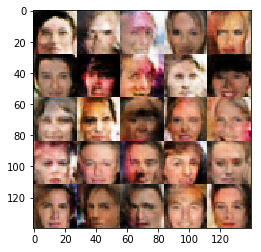

Epoch 0/1... Step: 4710... Discriminator Loss: 1.4030... Generator Loss: 0.7596
Epoch 0/1... Step: 4720... Discriminator Loss: 1.4490... Generator Loss: 0.7029
Epoch 0/1... Step: 4730... Discriminator Loss: 1.3652... Generator Loss: 1.5729
Epoch 0/1... Step: 4740... Discriminator Loss: 1.3400... Generator Loss: 0.9556
Epoch 0/1... Step: 4750... Discriminator Loss: 1.2376... Generator Loss: 0.8547
Epoch 0/1... Step: 4760... Discriminator Loss: 1.3108... Generator Loss: 0.8718
Epoch 0/1... Step: 4770... Discriminator Loss: 1.2829... Generator Loss: 0.8494
Epoch 0/1... Step: 4780... Discriminator Loss: 1.3721... Generator Loss: 0.9377
Epoch 0/1... Step: 4790... Discriminator Loss: 1.3522... Generator Loss: 0.7446
Epoch 0/1... Step: 4800... Discriminator Loss: 1.3037... Generator Loss: 0.7358


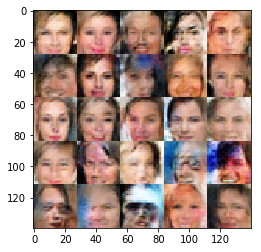

Epoch 0/1... Step: 4810... Discriminator Loss: 1.2609... Generator Loss: 0.7689
Epoch 0/1... Step: 4820... Discriminator Loss: 1.4102... Generator Loss: 0.5905
Epoch 0/1... Step: 4830... Discriminator Loss: 1.3096... Generator Loss: 0.9387
Epoch 0/1... Step: 4840... Discriminator Loss: 1.2005... Generator Loss: 0.8509
Epoch 0/1... Step: 4850... Discriminator Loss: 1.3284... Generator Loss: 0.8277
Epoch 0/1... Step: 4860... Discriminator Loss: 1.4424... Generator Loss: 0.9156
Epoch 0/1... Step: 4870... Discriminator Loss: 1.1901... Generator Loss: 1.0320
Epoch 0/1... Step: 4880... Discriminator Loss: 1.2454... Generator Loss: 0.9525
Epoch 0/1... Step: 4890... Discriminator Loss: 1.2841... Generator Loss: 0.9992
Epoch 0/1... Step: 4900... Discriminator Loss: 1.1714... Generator Loss: 0.7618


Epoch 0/1... Step: 4910... Discriminator Loss: 1.2473... Generator Loss: 0.9860
Epoch 0/1... Step: 4920... Discriminator Loss: 1.2396... Generator Loss: 0.8146
Epoch 0/1... Step: 4930... Discriminator Loss: 1.3522... Generator Loss: 0.7909
Epoch 0/1... Step: 4940... Discriminator Loss: 1.3151... Generator Loss: 0.9241
Epoch 0/1... Step: 4950... Discriminator Loss: 1.4048... Generator Loss: 0.6680
Epoch 0/1... Step: 4960... Discriminator Loss: 1.4634... Generator Loss: 0.8666
Epoch 0/1... Step: 4970... Discriminator Loss: 1.2811... Generator Loss: 0.8542
Epoch 0/1... Step: 4980... Discriminator Loss: 1.3525... Generator Loss: 0.6809
Epoch 0/1... Step: 4990... Discriminator Loss: 1.2514... Generator Loss: 1.3692
Epoch 0/1... Step: 5000... Discriminator Loss: 1.2237... Generator Loss: 0.7046


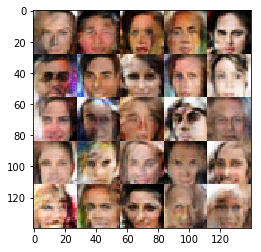

Epoch 0/1... Step: 5010... Discriminator Loss: 1.4537... Generator Loss: 0.7099
Epoch 0/1... Step: 5020... Discriminator Loss: 1.6555... Generator Loss: 0.7169
Epoch 0/1... Step: 5030... Discriminator Loss: 1.2826... Generator Loss: 0.7917
Epoch 0/1... Step: 5040... Discriminator Loss: 1.2845... Generator Loss: 0.6795
Epoch 0/1... Step: 5050... Discriminator Loss: 1.2877... Generator Loss: 0.7911
Epoch 0/1... Step: 5060... Discriminator Loss: 1.1946... Generator Loss: 0.9250
Epoch 0/1... Step: 5070... Discriminator Loss: 1.2961... Generator Loss: 0.9656
Epoch 0/1... Step: 5080... Discriminator Loss: 1.2704... Generator Loss: 1.1315
Epoch 0/1... Step: 5090... Discriminator Loss: 1.2593... Generator Loss: 0.8552
Epoch 0/1... Step: 5100... Discriminator Loss: 1.2857... Generator Loss: 0.9433


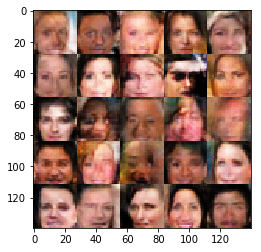

Epoch 0/1... Step: 5110... Discriminator Loss: 1.4954... Generator Loss: 0.7214
Epoch 0/1... Step: 5120... Discriminator Loss: 1.2847... Generator Loss: 0.8590
Epoch 0/1... Step: 5130... Discriminator Loss: 1.4292... Generator Loss: 0.8360
Epoch 0/1... Step: 5140... Discriminator Loss: 1.3901... Generator Loss: 0.7836
Epoch 0/1... Step: 5150... Discriminator Loss: 1.2877... Generator Loss: 0.8827
Epoch 0/1... Step: 5160... Discriminator Loss: 1.4123... Generator Loss: 0.8968
Epoch 0/1... Step: 5170... Discriminator Loss: 1.5912... Generator Loss: 0.5896
Epoch 0/1... Step: 5180... Discriminator Loss: 1.2673... Generator Loss: 1.0525
Epoch 0/1... Step: 5190... Discriminator Loss: 1.3614... Generator Loss: 0.7922
Epoch 0/1... Step: 5200... Discriminator Loss: 1.4735... Generator Loss: 0.7688


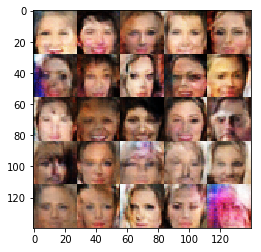

Epoch 0/1... Step: 5210... Discriminator Loss: 1.4081... Generator Loss: 0.8225
Epoch 0/1... Step: 5220... Discriminator Loss: 1.2954... Generator Loss: 0.9259
Epoch 0/1... Step: 5230... Discriminator Loss: 1.3726... Generator Loss: 0.8445
Epoch 0/1... Step: 5240... Discriminator Loss: 1.3261... Generator Loss: 0.9741
Epoch 0/1... Step: 5250... Discriminator Loss: 1.3988... Generator Loss: 0.7414
Epoch 0/1... Step: 5260... Discriminator Loss: 1.2478... Generator Loss: 1.9234
Epoch 0/1... Step: 5270... Discriminator Loss: 1.2211... Generator Loss: 1.0726
Epoch 0/1... Step: 5280... Discriminator Loss: 1.4594... Generator Loss: 0.7912
Epoch 0/1... Step: 5290... Discriminator Loss: 1.4238... Generator Loss: 0.8123
Epoch 0/1... Step: 5300... Discriminator Loss: 1.3246... Generator Loss: 0.7046


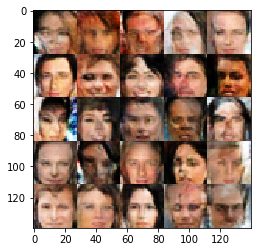

Epoch 0/1... Step: 5310... Discriminator Loss: 1.3974... Generator Loss: 0.7329
Epoch 0/1... Step: 5320... Discriminator Loss: 1.2054... Generator Loss: 0.9410
Epoch 0/1... Step: 5330... Discriminator Loss: 1.3506... Generator Loss: 0.9544
Epoch 0/1... Step: 5340... Discriminator Loss: 1.2857... Generator Loss: 0.9861
Epoch 0/1... Step: 5350... Discriminator Loss: 1.2311... Generator Loss: 0.9339
Epoch 0/1... Step: 5360... Discriminator Loss: 1.3904... Generator Loss: 0.6751
Epoch 0/1... Step: 5370... Discriminator Loss: 1.2190... Generator Loss: 0.9128
Epoch 0/1... Step: 5380... Discriminator Loss: 1.2622... Generator Loss: 0.9204
Epoch 0/1... Step: 5390... Discriminator Loss: 1.3993... Generator Loss: 0.7139
Epoch 0/1... Step: 5400... Discriminator Loss: 1.3453... Generator Loss: 0.5804


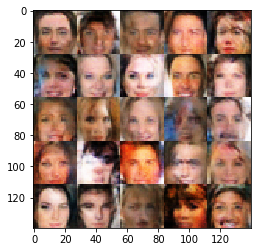

Epoch 0/1... Step: 5410... Discriminator Loss: 1.4085... Generator Loss: 0.9777
Epoch 0/1... Step: 5420... Discriminator Loss: 1.2636... Generator Loss: 1.2948
Epoch 0/1... Step: 5430... Discriminator Loss: 1.3278... Generator Loss: 0.6896
Epoch 0/1... Step: 5440... Discriminator Loss: 1.4291... Generator Loss: 0.8067
Epoch 0/1... Step: 5450... Discriminator Loss: 1.2384... Generator Loss: 0.8643
Epoch 0/1... Step: 5460... Discriminator Loss: 1.3064... Generator Loss: 0.8415
Epoch 0/1... Step: 5470... Discriminator Loss: 1.2884... Generator Loss: 1.4719
Epoch 0/1... Step: 5480... Discriminator Loss: 1.4170... Generator Loss: 0.7761
Epoch 0/1... Step: 5490... Discriminator Loss: 1.3175... Generator Loss: 0.9808
Epoch 0/1... Step: 5500... Discriminator Loss: 1.4762... Generator Loss: 0.6390


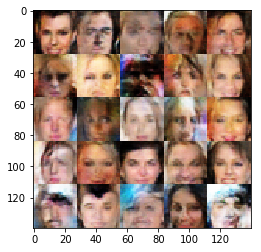

Epoch 0/1... Step: 5510... Discriminator Loss: 1.2414... Generator Loss: 0.8990
Epoch 0/1... Step: 5520... Discriminator Loss: 1.4479... Generator Loss: 0.7238
Epoch 0/1... Step: 5530... Discriminator Loss: 1.5217... Generator Loss: 0.6514
Epoch 0/1... Step: 5540... Discriminator Loss: 1.1204... Generator Loss: 1.1769
Epoch 0/1... Step: 5550... Discriminator Loss: 1.3650... Generator Loss: 0.8005
Epoch 0/1... Step: 5560... Discriminator Loss: 1.2898... Generator Loss: 1.1218
Epoch 0/1... Step: 5570... Discriminator Loss: 1.1637... Generator Loss: 0.8438
Epoch 0/1... Step: 5580... Discriminator Loss: 1.4748... Generator Loss: 0.7270
Epoch 0/1... Step: 5590... Discriminator Loss: 1.3782... Generator Loss: 0.7575
Epoch 0/1... Step: 5600... Discriminator Loss: 1.3901... Generator Loss: 0.8477


Epoch 0/1... Step: 5610... Discriminator Loss: 1.4525... Generator Loss: 0.7158
Epoch 0/1... Step: 5620... Discriminator Loss: 1.5618... Generator Loss: 0.7005
Epoch 0/1... Step: 5630... Discriminator Loss: 1.5819... Generator Loss: 0.6369
Epoch 0/1... Step: 5640... Discriminator Loss: 1.3302... Generator Loss: 0.9963
Epoch 0/1... Step: 5650... Discriminator Loss: 1.2099... Generator Loss: 0.9114
Epoch 0/1... Step: 5660... Discriminator Loss: 1.3667... Generator Loss: 0.8679
Epoch 0/1... Step: 5670... Discriminator Loss: 1.2407... Generator Loss: 1.0123
Epoch 0/1... Step: 5680... Discriminator Loss: 1.4785... Generator Loss: 0.7476
Epoch 0/1... Step: 5690... Discriminator Loss: 1.5214... Generator Loss: 0.5889
Epoch 0/1... Step: 5700... Discriminator Loss: 1.1799... Generator Loss: 1.0730


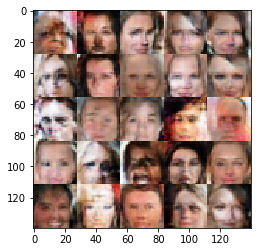

Epoch 0/1... Step: 5710... Discriminator Loss: 1.4136... Generator Loss: 0.8042
Epoch 0/1... Step: 5720... Discriminator Loss: 1.4064... Generator Loss: 0.8374
Epoch 0/1... Step: 5730... Discriminator Loss: 1.3372... Generator Loss: 0.9169
Epoch 0/1... Step: 5740... Discriminator Loss: 1.1740... Generator Loss: 1.0380
Epoch 0/1... Step: 5750... Discriminator Loss: 1.3420... Generator Loss: 0.7372
Epoch 0/1... Step: 5760... Discriminator Loss: 1.4333... Generator Loss: 0.6900
Epoch 0/1... Step: 5770... Discriminator Loss: 1.2794... Generator Loss: 1.3189
Epoch 0/1... Step: 5780... Discriminator Loss: 1.2663... Generator Loss: 0.7591
Epoch 0/1... Step: 5790... Discriminator Loss: 1.2887... Generator Loss: 0.9511
Epoch 0/1... Step: 5800... Discriminator Loss: 1.4121... Generator Loss: 0.8201


Epoch 0/1... Step: 5810... Discriminator Loss: 1.3606... Generator Loss: 0.7275
Epoch 0/1... Step: 5820... Discriminator Loss: 1.4179... Generator Loss: 0.6673
Epoch 0/1... Step: 5830... Discriminator Loss: 1.3221... Generator Loss: 0.8631
Epoch 0/1... Step: 5840... Discriminator Loss: 1.4358... Generator Loss: 0.7769
Epoch 0/1... Step: 5850... Discriminator Loss: 1.3309... Generator Loss: 0.8939
Epoch 0/1... Step: 5860... Discriminator Loss: 1.2071... Generator Loss: 0.9295
Epoch 0/1... Step: 5870... Discriminator Loss: 1.1389... Generator Loss: 1.5689
Epoch 0/1... Step: 5880... Discriminator Loss: 1.3574... Generator Loss: 0.6752
Epoch 0/1... Step: 5890... Discriminator Loss: 1.3790... Generator Loss: 0.6133
Epoch 0/1... Step: 5900... Discriminator Loss: 1.2606... Generator Loss: 0.8332


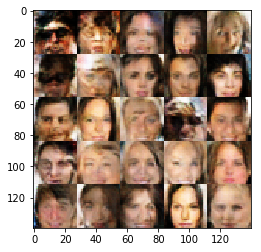

Epoch 0/1... Step: 5910... Discriminator Loss: 1.1614... Generator Loss: 1.0515
Epoch 0/1... Step: 5920... Discriminator Loss: 1.2055... Generator Loss: 0.8052
Epoch 0/1... Step: 5930... Discriminator Loss: 1.2839... Generator Loss: 0.9554
Epoch 0/1... Step: 5940... Discriminator Loss: 1.1978... Generator Loss: 1.0683
Epoch 0/1... Step: 5950... Discriminator Loss: 1.2960... Generator Loss: 0.9348
Epoch 0/1... Step: 5960... Discriminator Loss: 1.3609... Generator Loss: 0.6672
Epoch 0/1... Step: 5970... Discriminator Loss: 1.2784... Generator Loss: 1.0218
Epoch 0/1... Step: 5980... Discriminator Loss: 1.2906... Generator Loss: 0.7376
Epoch 0/1... Step: 5990... Discriminator Loss: 1.3736... Generator Loss: 0.7847
Epoch 0/1... Step: 6000... Discriminator Loss: 1.4554... Generator Loss: 0.7206


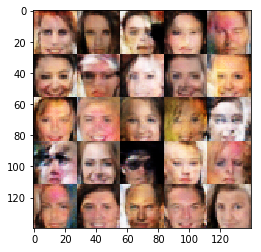

Epoch 0/1... Step: 6010... Discriminator Loss: 1.2013... Generator Loss: 0.8885
Epoch 0/1... Step: 6020... Discriminator Loss: 1.5094... Generator Loss: 0.8430
Epoch 0/1... Step: 6030... Discriminator Loss: 1.2856... Generator Loss: 0.8770
Epoch 0/1... Step: 6040... Discriminator Loss: 1.4245... Generator Loss: 0.8302
Epoch 0/1... Step: 6050... Discriminator Loss: 1.2900... Generator Loss: 0.8556
Epoch 0/1... Step: 6060... Discriminator Loss: 1.3109... Generator Loss: 0.8716
Epoch 0/1... Step: 6070... Discriminator Loss: 1.2453... Generator Loss: 1.1151
Epoch 0/1... Step: 6080... Discriminator Loss: 1.4412... Generator Loss: 0.6918
Epoch 0/1... Step: 6090... Discriminator Loss: 1.4002... Generator Loss: 0.7499
Epoch 0/1... Step: 6100... Discriminator Loss: 1.2939... Generator Loss: 0.8396


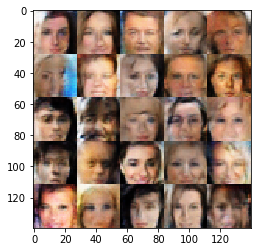

Epoch 0/1... Step: 6110... Discriminator Loss: 1.4542... Generator Loss: 0.9505
Epoch 0/1... Step: 6120... Discriminator Loss: 1.3162... Generator Loss: 0.7307
Epoch 0/1... Step: 6130... Discriminator Loss: 1.1663... Generator Loss: 0.8175
Epoch 0/1... Step: 6140... Discriminator Loss: 1.1744... Generator Loss: 0.7063
Epoch 0/1... Step: 6150... Discriminator Loss: 1.3139... Generator Loss: 1.1445
Epoch 0/1... Step: 6160... Discriminator Loss: 1.3727... Generator Loss: 0.7866
Epoch 0/1... Step: 6170... Discriminator Loss: 1.4513... Generator Loss: 0.7754
Epoch 0/1... Step: 6180... Discriminator Loss: 1.5619... Generator Loss: 0.5998
Epoch 0/1... Step: 6190... Discriminator Loss: 1.2552... Generator Loss: 0.7759
Epoch 0/1... Step: 6200... Discriminator Loss: 1.1634... Generator Loss: 1.0825


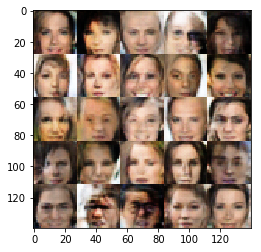

Epoch 0/1... Step: 6210... Discriminator Loss: 1.4295... Generator Loss: 0.6218
Epoch 0/1... Step: 6220... Discriminator Loss: 1.3567... Generator Loss: 0.6534
Epoch 0/1... Step: 6230... Discriminator Loss: 1.4159... Generator Loss: 1.2005
Epoch 0/1... Step: 6240... Discriminator Loss: 1.3170... Generator Loss: 0.8436
Epoch 0/1... Step: 6250... Discriminator Loss: 1.4234... Generator Loss: 1.0483
Epoch 0/1... Step: 6260... Discriminator Loss: 1.4212... Generator Loss: 0.7268
Epoch 0/1... Step: 6270... Discriminator Loss: 1.2470... Generator Loss: 0.9744
Epoch 0/1... Step: 6280... Discriminator Loss: 1.3174... Generator Loss: 0.7500
Epoch 0/1... Step: 6290... Discriminator Loss: 1.3031... Generator Loss: 0.7010
Epoch 0/1... Step: 6300... Discriminator Loss: 1.2214... Generator Loss: 0.7393


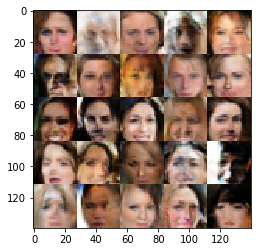

Epoch 0/1... Step: 6310... Discriminator Loss: 1.2309... Generator Loss: 1.1155
Epoch 0/1... Step: 6320... Discriminator Loss: 1.3650... Generator Loss: 0.9870
Epoch 0/1... Step: 6330... Discriminator Loss: 1.2825... Generator Loss: 0.7950


In [33]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.